In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Read the CSV file
file_path = '/Users/yu/Desktop/Weather Data/3987666.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to check its structure
data.head()

/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/673316979.py:3: DtypeWarning: Columns (3,32,33,43,44,50,52,53,70,72,89,96) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
0,72202012839,2015-01-01T00:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-07-14
1,72202012839,2015-01-01T01:00:00,FM-12,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-07-14
2,72202012839,2015-01-01T01:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-07-14
3,72202012839,2015-01-01T02:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-07-14
4,72202012839,2015-01-01T03:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-07-14


In [44]:
# Display all column names in the dataset
print("All columns in the dataset:")
print(data.columns.tolist())

All columns in the dataset:
['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'AWND', 'BackupDirection', 'BackupDistance', 'BackupDistanceUnit', 'BackupElements', 'BackupElevation', 'BackupElevationUnit', 'BackupEquipment', 'BackupLatitude', 'BackupLongitude', 'BackupName', 'CDSD', 'CLDD', 'DSNW', 'DYHF', 'DYTS', 'DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity', 'DailyAverageSeaLevelPressure', 'DailyAverageStationPressure', 'DailyAverageWetBulbTemperature', 'DailyAverageWindSpeed', 'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature', 'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemperature', 'DailyMinimumDryBulbTemperature', 'DailyPeakWindDirection', 'DailyPeakWindSpeed', 'DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall', 'DailySustainedWindDirection', 'DailySustainedWindSpeed', 'DailyWeather', 'HDSD', 'HTDD', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 

In [45]:
# Select hourly variables and basic information
hourly_columns = ['STATION', 'DATE','REPORT_TYPE'] + [col for col in data.columns if col.startswith('Hourly')]

# Ensure all selected columns exist in the dataset
available_hourly_columns = [col for col in hourly_columns if col in data.columns]

# Create a new dataframe with only the selected columns
hourly_data = data[available_hourly_columns].copy()

# Display the columns in the new dataframe
print("Selected hourly columns:")
print(hourly_data.columns.tolist())

# Display the first few rows of the new dataframe
hourly_data.head()

Selected hourly columns:
['STATION', 'DATE', 'REPORT_TYPE', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPresentWeatherType', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlySkyConditions', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindGustSpeed', 'HourlyWindSpeed']


,STATION,DATE,REPORT_TYPE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed
0,72202012839,2015-01-01T00:53:00,FM-15,30.15,68.0,71,0.00,NaN,0.03,6.0,90.0,30.15,FEW:02 10 SCT:04 15 BKN:07 45,30.12,9.0,69.0,320,NaN,3.0
1,72202012839,2015-01-01T01:00:00,FM-12,NaN,68.0,71,NaN,NaN,0.03,6.0,90.0,30.15,15,30.12,8.7,69.0,320,NaN,3.0
2,72202012839,2015-01-01T01:53:00,FM-15,30.15,68.0,71,0.00,NaN,NaN,NaN,90.0,30.14,FEW:02 15 SCT:04 25 BKN:07 40,30.12,8.0,69.0,310,NaN,3.0
3,72202012839,2015-01-01T02:53:00,FM-15,30.13,68.0,71,0.00,NaN,NaN,NaN,90.0,30.13,FEW:02 20 BKN:07 39 OVC:08 200,30.1,7.0,69.0,000,NaN,0.0
4,72202012839,2015-01-01T03:53:00,FM-15,30.12,68.0,71,0.00,NaN,0.03,7.0,90.0,30.12,FEW:02 15 BKN:07 45 BKN:07 80,30.09,7.0,69.0,000,NaN,0.0


In [46]:
# Display all column names in the dataset
print("All columns in the dataset:")
print(hourly_data.columns.tolist())

All columns in the dataset:
['STATION', 'DATE', 'REPORT_TYPE', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPresentWeatherType', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlySkyConditions', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindGustSpeed', 'HourlyWindSpeed']


In [47]:
# Define a priority order for REPORT_TYPE
# For hourly prediction, we prioritize hourly observations over summaries
report_type_priority = {
    'FM-15': 1,  # Highest priority - Hourly Surface Weather Observation
    'FM-12': 2,  # SYNOP Report - Surface Synoptic Observation
    'FM-16': 3,  # METAR - Meteorological Aerodrome Report
    'SOD': 4,    # Summary of Day - lower priority
    'SOM': 5     # Summary of Month - lowest priority
}

# Create a priority column based on REPORT_TYPE
hourly_data['priority'] = hourly_data['REPORT_TYPE'].map(report_type_priority)

# For missing priorities (NaN), set to highest number (lowest priority)
hourly_data['priority'] = hourly_data['priority'].fillna(99)

# Sort by DATE and priority
hourly_data = hourly_data.sort_values(['DATE', 'priority'])

# Keep the highest priority record for each timestamp
hourly_data = hourly_data.drop_duplicates(subset=['DATE'], keep='first')

# Drop the temporary priority column
hourly_data = hourly_data.drop('priority', axis=1)

# Verify that duplicates have been removed
duplicate_check = hourly_data.duplicated(subset=['DATE'], keep=False)
print(f"Number of duplicate timestamps after filtering: {duplicate_check.sum()}")

# Final dataset shape
print(f"Final dataset shape: {hourly_data.shape}")

Number of duplicate timestamps after filtering: 0
Final dataset shape: (134616, 19)


Dataset shape: (134616, 19)
Total number of rows: 134616
This represents approximately 15.4 years of hourly data

Missing values summary:
                           Missing Count  Missing Percentage
HourlyPresentWeatherType          119622           88.861651
HourlyWindGustSpeed               117534           87.310572
HourlyPressureTendency             76864           57.098710
HourlyPressureChange               76864           57.098710
HourlyPrecipitation                41471           30.806888
HourlyAltimeterSetting             32397           24.066233
HourlySeaLevelPressure             18234           13.545195
HourlySkyConditions                 7666            5.694717
HourlyWindDirection                 5027            3.734326
HourlyWetBulbTemperature            4796            3.562727
HourlyStationPressure               4774            3.546384
HourlyWindSpeed                     3730            2.770844
HourlyRelativeHumidity              3688            2.739645
HourlyDe

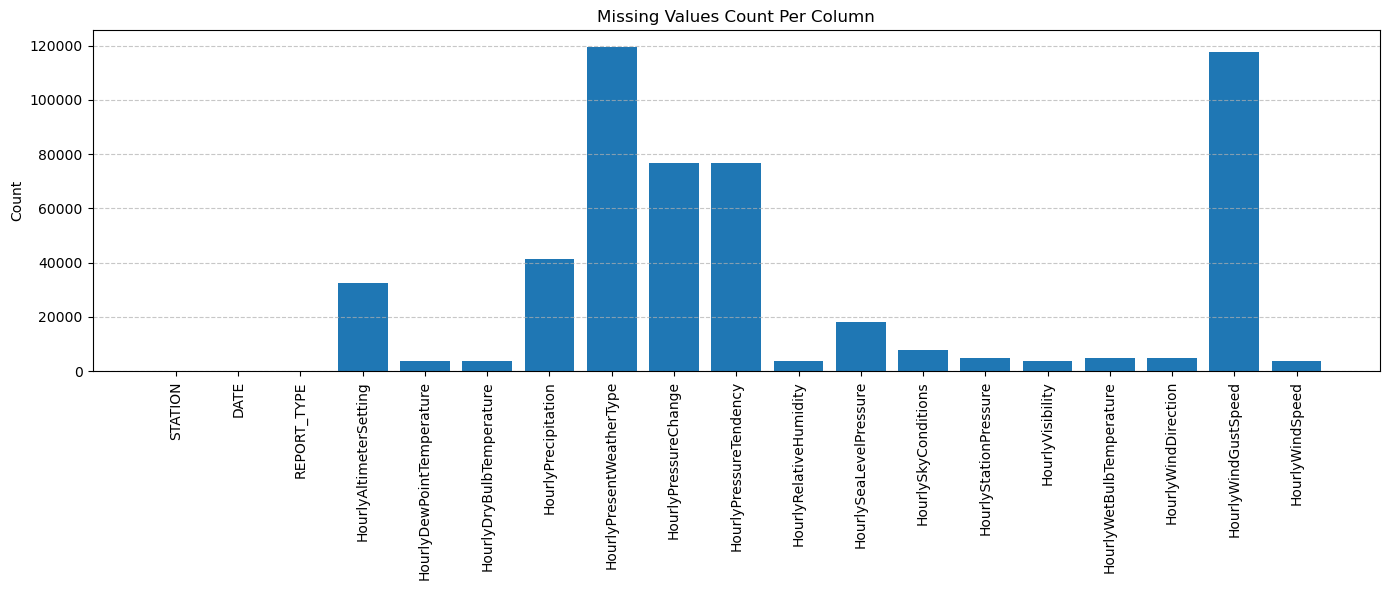


Number of duplicate timestamps: 0

Data types of each column:
STATION                               int64
DATE                         datetime64[ns]
REPORT_TYPE                          object
HourlyAltimeterSetting              float64
HourlyDewPointTemperature            object
HourlyDryBulbTemperature             object
HourlyPrecipitation                  object
HourlyPresentWeatherType             object
HourlyPressureChange                float64
HourlyPressureTendency              float64
HourlyRelativeHumidity              float64
HourlySeaLevelPressure               object
HourlySkyConditions                  object
HourlyStationPressure                object
HourlyVisibility                     object
HourlyWetBulbTemperature            float64
HourlyWindDirection                  object
HourlyWindGustSpeed                 float64
HourlyWindSpeed                     float64
dtype: object

Statistical summary of numerical columns:
            STATION                         

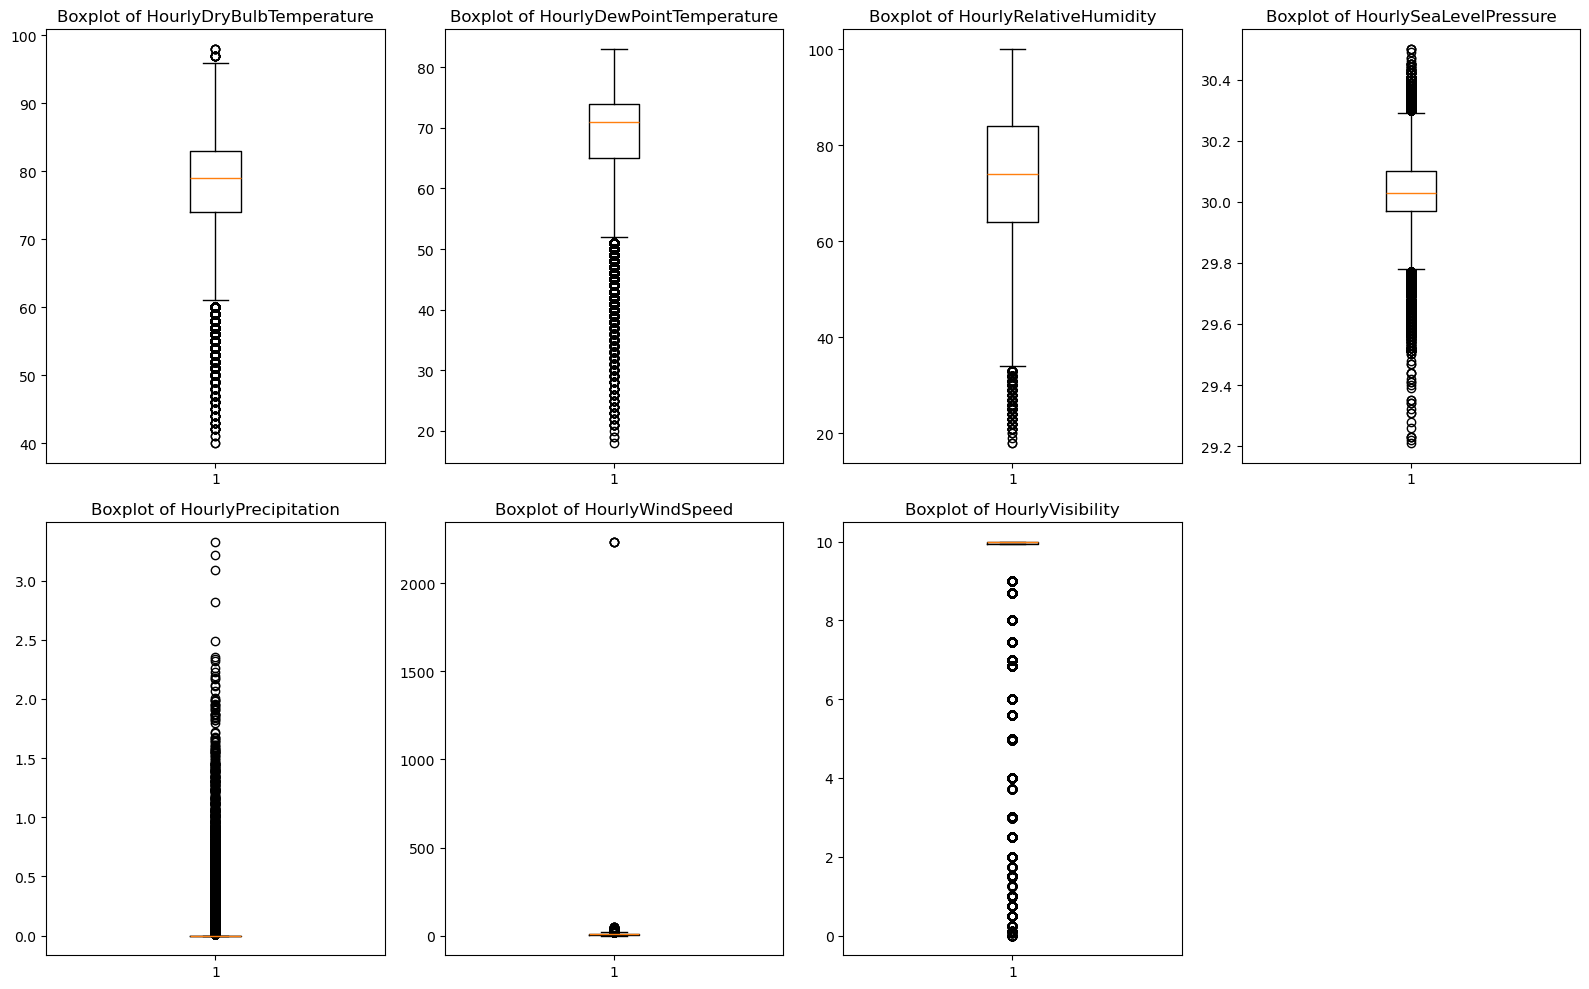

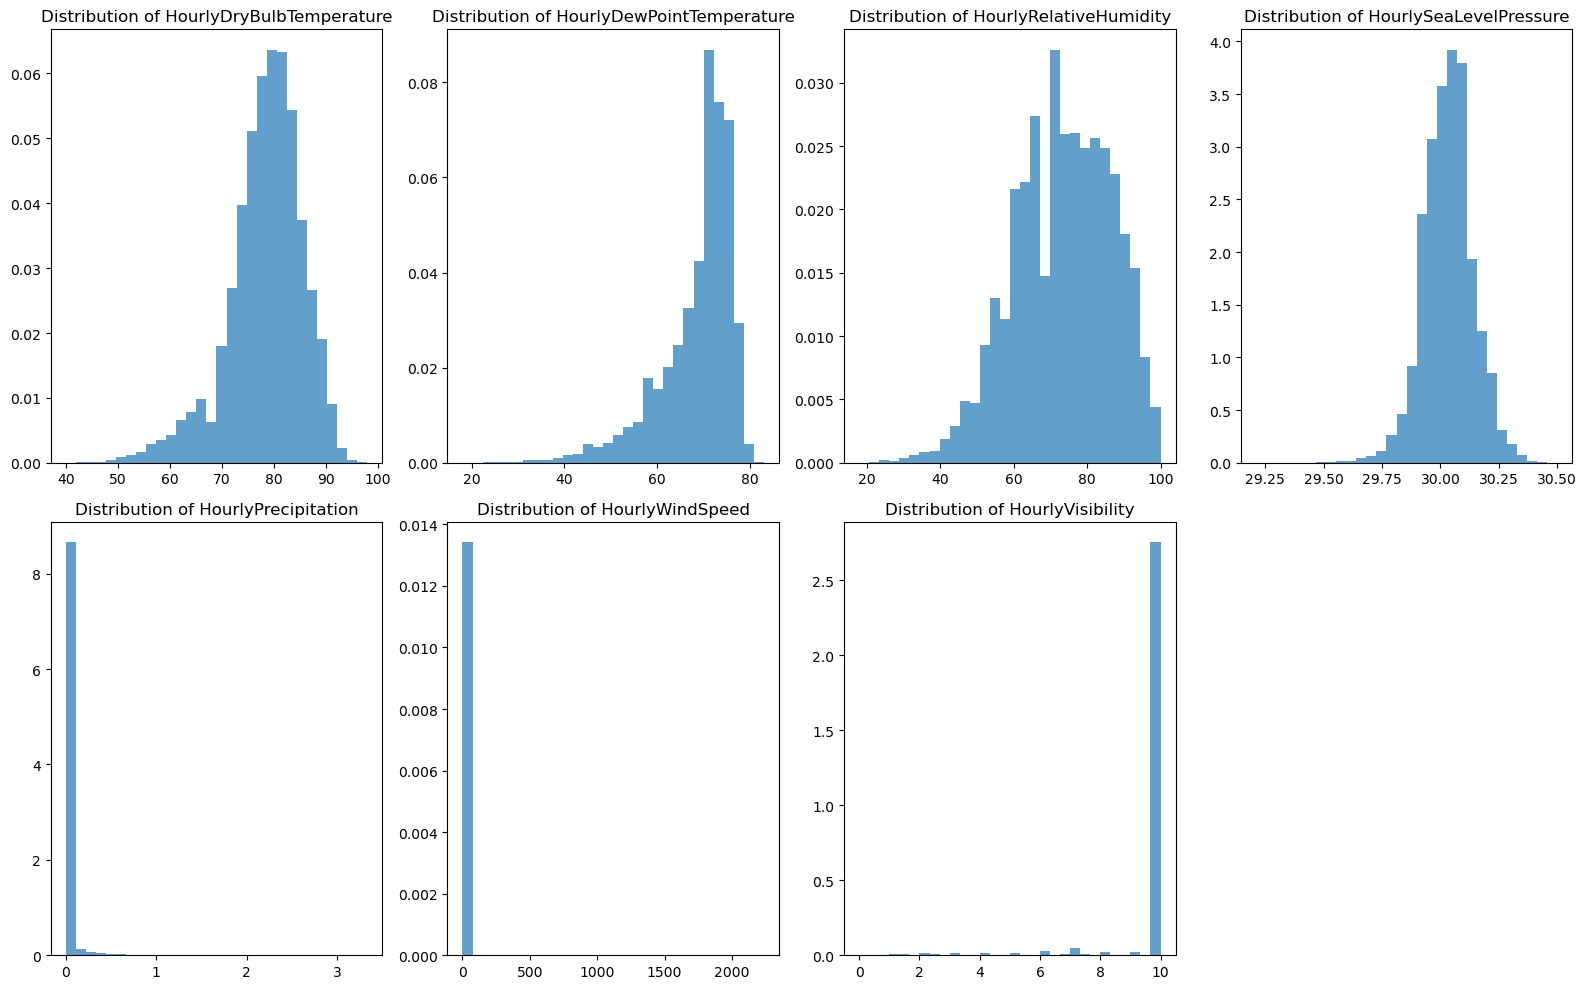


Extreme outliers in key variables (outside 3 standard deviations):
HourlyDryBulbTemperature: 1478 outliers (1.13% of data)
   Range: [40.0, 98.0]
   Expected range: [56.48, 100.14]
HourlyDewPointTemperature: 2252 outliers (1.72% of data)
   Range: [18.0, 83.0]
   Expected range: [44.67, 92.52]
HourlyRelativeHumidity: 442 outliers (0.34% of data)
   Range: [18.0, 100.0]
   Expected range: [33.34, 113.47]
HourlySeaLevelPressure: 916 outliers (0.79% of data)
   Range: [29.21, 30.5]
   Expected range: [29.71, 30.35]
HourlyPrecipitation: 1372 outliers (1.59% of data)
   Range: [0.0, 3.33]
   Expected range: [-0.29, 0.33]
HourlyWindSpeed: 6 outliers (0.00% of data)
   Range: [0.0, 2237.0]
   Expected range: [-31.78, 47.70]
HourlyVisibility: 4768 outliers (3.64% of data)
   Range: [0.0, 10.0]
   Expected range: [5.12, 14.08]


In [49]:
# Comprehensive initial data inspection for hourly_data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Check dataset size
print(f"Dataset shape: {hourly_data.shape}")
print(f"Total number of rows: {len(hourly_data)}")
print(f"This represents approximately {len(hourly_data)/(24*365):.1f} years of hourly data\n")

# 2. Count and visualize missing values
missing_values = hourly_data.isna().sum()
missing_percentage = (missing_values / len(hourly_data)) * 100

print("Missing values summary:")
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_summary.sort_values('Missing Count', ascending=False))

# Visualize missing values
plt.figure(figsize=(14, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values Count Per Column')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Check for duplicate timestamps
duplicate_timestamps = hourly_data.duplicated(subset=['DATE'], keep=False)
duplicate_count = duplicate_timestamps.sum()
print(f"\nNumber of duplicate timestamps: {duplicate_count}")
if duplicate_count > 0:
    print("Sample of records with duplicate timestamps:")
    print(hourly_data[duplicate_timestamps].sort_values('DATE').head())

# 4. Examine data types
print("\nData types of each column:")
print(hourly_data.dtypes)

# Check if DATE is in datetime format
if not pd.api.types.is_datetime64_dtype(hourly_data['DATE']):
    print("\nConverting DATE to datetime format...")
    hourly_data['DATE'] = pd.to_datetime(hourly_data['DATE'])
    print("Conversion successful.")

# 5. Statistical summary for numerical columns
print("\nStatistical summary of numerical columns:")
print(hourly_data.describe())

# 6. Look for outliers in key variables
key_variables = [
    'HourlyDryBulbTemperature', 'HourlyDewPointTemperature', 
    'HourlyRelativeHumidity', 'HourlySeaLevelPressure',
    'HourlyPrecipitation', 'HourlyWindSpeed', 'HourlyVisibility'
]

# Filter to only include key variables that exist in the dataset
key_vars_exist = [var for var in key_variables if var in hourly_data.columns]

# Create boxplots for key variables - using matplotlib instead of seaborn
plt.figure(figsize=(16, 10))
for i, var in enumerate(key_vars_exist, 1):
    plt.subplot(2, 4, i)
    # Convert to numeric and drop non-numeric values
    data_to_plot = pd.to_numeric(hourly_data[var], errors='coerce').dropna()
    plt.boxplot(data_to_plot)
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

# Create histograms for key variables
plt.figure(figsize=(16, 10))
for i, var in enumerate(key_vars_exist, 1):
    plt.subplot(2, 4, i)
    # Convert to numeric and drop non-numeric values
    data_to_plot = pd.to_numeric(hourly_data[var], errors='coerce').dropna()
    plt.hist(data_to_plot, bins=30, alpha=0.7, density=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# Check for extreme outliers (more than 3 std deviations from mean)
print("\nExtreme outliers in key variables (outside 3 standard deviations):")
for var in key_vars_exist:
    # Convert to numeric first
    numeric_data = pd.to_numeric(hourly_data[var], errors='coerce')
    if not numeric_data.isna().all():  # Skip if all values are NaN after conversion
        mean = numeric_data.mean()
        std = numeric_data.std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        outliers = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]
        outlier_count = len(outliers.dropna())
        if outlier_count > 0:
            outlier_percent = (outlier_count / len(numeric_data.dropna())) * 100
            print(f"{var}: {outlier_count} outliers ({outlier_percent:.2f}% of data)")
            print(f"   Range: [{numeric_data.min()}, {numeric_data.max()}]")
            print(f"   Expected range: [{lower_bound:.2f}, {upper_bound:.2f}]")

In [50]:
# Display all column names in the dataset
print("All columns in the dataset:")
print(hourly_data.columns.tolist())

All columns in the dataset:
['STATION', 'DATE', 'REPORT_TYPE', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPresentWeatherType', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlySkyConditions', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindGustSpeed', 'HourlyWindSpeed']


Column data types after conversion:
STATION                        int64
REPORT_TYPE                   object
HourlyAltimeterSetting       float64
HourlyDewPointTemperature    float64
HourlyDryBulbTemperature     float64
HourlyPrecipitation          float64
HourlyPresentWeatherType      object
HourlyPressureChange         float64
HourlyPressureTendency       float64
HourlyRelativeHumidity       float64
HourlySeaLevelPressure       float64
HourlySkyConditions           object
HourlyStationPressure        float64
HourlyVisibility             float64
HourlyWetBulbTemperature     float64
HourlyWindDirection           object
HourlyWindGustSpeed          float64
HourlyWindSpeed              float64
dtype: object

Missing values before imputation:
STATION                           0
REPORT_TYPE                       0
HourlyAltimeterSetting        32397
HourlyDewPointTemperature         0
HourlyDryBulbTemperature          0
HourlyPrecipitation           48359
HourlyPresentWeatherType     1196

/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/2199178770.py:255: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hum_vis_data = hum_vis_data.fillna(method='ffill', limit=1)
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/2199178770.py:256: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hum_vis_data = hum_vis_data.fillna(method='bfill', limit=1)
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/2199178770.py:188: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wind_direction = wind_direction.fillna(method='ffill', limit=3)
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/2199178770.py:189: FutureWarning: Series.fillna with 'method' is deprecated and will rai

Imputing sky conditions...
Imputing precipitation...
Imputing pressure variables...
Computing pressure changes...
Handling present weather type...

Missing values after imputation:
STATION                       0
REPORT_TYPE                   0
HourlyAltimeterSetting        0
HourlyDewPointTemperature     0
HourlyDryBulbTemperature      0
HourlyPrecipitation           0
HourlyPresentWeatherType      0
HourlyPressureChange          1
HourlyPressureTendency        0
HourlyRelativeHumidity        0
HourlySeaLevelPressure        0
HourlySkyConditions           0
HourlyStationPressure         0
HourlyVisibility             35
HourlyWetBulbTemperature      0
HourlyWindDirection           3
HourlyWindGustSpeed          25
HourlyWindSpeed              25
WeatherType_Missing           0
dtype: int64

Preparing visualization...


/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/2199178770.py:175: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pressure_data = pressure_data.fillna(method='ffill', limit=2)
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/2199178770.py:176: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pressure_data = pressure_data.fillna(method='bfill', limit=2)
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/2199178770.py:341: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result['HourlyPresentWeatherType'] = result['HourlyPresentWeatherType'].fillna(method='ffill', limit=2)


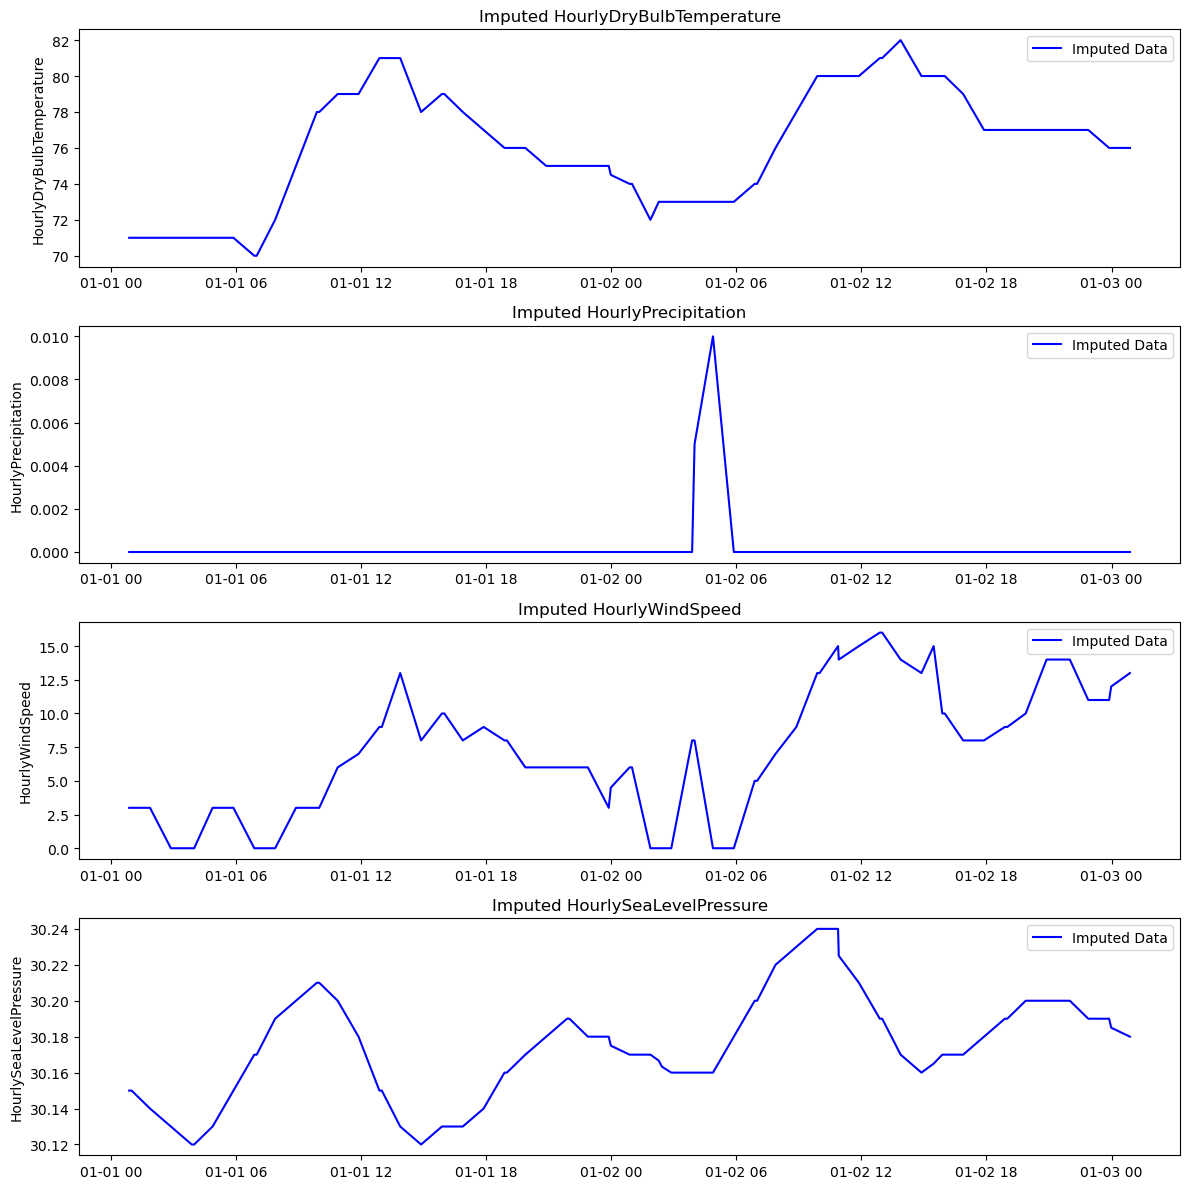


Creating missingness indicators...

Imputation completed successfully!
Initial missing values total: 518466
Remaining missing values total: 89
Filled values: 518377


In [53]:
# Weather Data Complete Imputation Solution

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate

# 1. First, let's convert all potentially numeric columns to float
# List of columns that should be numeric
numeric_cols = [
    'HourlyDryBulbTemperature', 
    'HourlyDewPointTemperature', 
    'HourlyWetBulbTemperature',
    'HourlyPrecipitation',
    'HourlyAltimeterSetting',
    'HourlyPressureChange',
    'HourlyPressureTendency',
    'HourlyRelativeHumidity',
    'HourlySeaLevelPressure',
    'HourlyStationPressure',
    'HourlyVisibility',
    'HourlyWindGustSpeed',
    'HourlyWindSpeed'
]

# Convert each column to numeric, forcing non-numeric values to NaN
for col in numeric_cols:
    if col in hourly_data.columns:
        hourly_data[col] = pd.to_numeric(hourly_data[col], errors='coerce')

# Check data types after conversion
print("Column data types after conversion:")
print(hourly_data.dtypes)

# 2. Ensure DATE is the index for time series analysis
if 'DATE' in hourly_data.columns:
    hourly_data['DATE'] = pd.to_datetime(hourly_data['DATE'])
    hourly_data = hourly_data.set_index('DATE').sort_index()

# 3. Check missing values before imputation
missing_before = hourly_data.isna().sum()
print("\nMissing values before imputation:")
print(missing_before)

# 4. Define imputation functions with proper type checking

def impute_precipitation(data):
    """
    Impute missing precipitation values.
    Strategy: If surrounding hours have zero precipitation, fill with zero.
              Otherwise, use interpolation.
    """
    # Skip if column doesn't exist or isn't numeric
    if 'HourlyPrecipitation' not in data.columns or not pd.api.types.is_numeric_dtype(data['HourlyPrecipitation']):
        print("Skipping precipitation imputation - column not available or not numeric")
        return pd.Series(dtype='float64')
    
    # Create a copy of precipitation data
    precip_data = data['HourlyPrecipitation'].copy()
    
    # Find indices of missing values
    missing_indices = precip_data[precip_data.isna()].index
    
    for idx in missing_indices:
        # Try to get values for surrounding hours (±3 hours)
        try:
            surrounding = precip_data[idx - pd.Timedelta(hours=3):idx + pd.Timedelta(hours=3)]
            surrounding = surrounding.dropna()
            
            # If all surrounding values are zero, fill with zero
            if len(surrounding) > 0 and (surrounding == 0).all():
                precip_data.loc[idx] = 0
            # Otherwise leave as NaN for now (will be interpolated later if needed)
        except:
            continue
    
    # Fill remaining NaNs with linear interpolation for short gaps
    precip_data = precip_data.interpolate(method='linear', limit=2)
    
    # For any remaining NaNs, fill with 0 (assumption: no evidence of precipitation)
    precip_data = precip_data.fillna(0)
    
    return precip_data

def impute_temperature_variables(data):
    """
    Impute missing temperature-related variables using interpolation.
    Applies to: HourlyDryBulbTemperature, HourlyDewPointTemperature, HourlyWetBulbTemperature
    """
    temp_vars = ['HourlyDryBulbTemperature', 'HourlyDewPointTemperature', 'HourlyWetBulbTemperature']
    
    # Filter to only existing numeric columns
    valid_temp_vars = []
    for col in temp_vars:
        if col in data.columns and pd.api.types.is_numeric_dtype(data[col]):
            valid_temp_vars.append(col)
    
    if not valid_temp_vars:
        print("No valid temperature columns found for imputation")
        return pd.DataFrame()
        
    temp_data = data[valid_temp_vars].copy()
    
    # Linear interpolation for gaps up to 2 hours
    temp_data = temp_data.interpolate(method='linear', limit=2)
    
    # For larger gaps, use time-of-day aware interpolation
    # Add hour of day as a feature
    temp_data['hour'] = temp_data.index.hour
    
    for col in valid_temp_vars:
        # If still have missing values after linear interpolation
        if temp_data[col].isna().sum() > 0:
            # Group by hour and calculate mean (will only work for numeric columns)
            hourly_avg = temp_data.groupby('hour')[col].mean()
            
            # Fill remaining NaNs with the average for that hour of day
            for idx in temp_data[temp_data[col].isna()].index:
                hour = idx.hour
                if hour in hourly_avg.index:  # Make sure we have data for this hour
                    temp_data.loc[idx, col] = hourly_avg[hour]
    
    # Remove the temporary hour column
    temp_data = temp_data.drop(columns=['hour'])
    
    return temp_data

def impute_pressure_variables(data):
    """
    Impute missing pressure-related variables.
    Applies to: HourlyAltimeterSetting, HourlySeaLevelPressure, HourlyStationPressure
    """
    pressure_vars = ['HourlyAltimeterSetting', 'HourlySeaLevelPressure', 'HourlyStationPressure']
    
    # Filter to only existing numeric columns
    valid_pressure_vars = []
    for col in pressure_vars:
        if col in data.columns and pd.api.types.is_numeric_dtype(data[col]):
            valid_pressure_vars.append(col)
    
    if not valid_pressure_vars:
        print("No valid pressure columns found for imputation")
        return pd.DataFrame()
        
    pressure_data = data[valid_pressure_vars].copy()
    
    # Linear interpolation for short gaps
    pressure_data = pressure_data.interpolate(method='linear', limit=3)
    
    # For remaining NaNs, try to derive one pressure variable from another if possible
    
    # If HourlyStationPressure is available but HourlySeaLevelPressure is not
    if 'HourlyStationPressure' in valid_pressure_vars and 'HourlySeaLevelPressure' in valid_pressure_vars:
        mask = pressure_data['HourlySeaLevelPressure'].isna() & pressure_data['HourlyStationPressure'].notna()
        if mask.sum() > 0:
            # Approximate conversion (simplified)
            pressure_data.loc[mask, 'HourlySeaLevelPressure'] = pressure_data.loc[mask, 'HourlyStationPressure'] * 1.04
    
    # If HourlySeaLevelPressure is available but HourlyStationPressure is not
    if 'HourlySeaLevelPressure' in valid_pressure_vars and 'HourlyStationPressure' in valid_pressure_vars:
        mask = pressure_data['HourlyStationPressure'].isna() & pressure_data['HourlySeaLevelPressure'].notna()
        if mask.sum() > 0:
            pressure_data.loc[mask, 'HourlyStationPressure'] = pressure_data.loc[mask, 'HourlySeaLevelPressure'] / 1.04
    
    # For HourlyAltimeterSetting, derive from HourlySeaLevelPressure if available
    if 'HourlyAltimeterSetting' in valid_pressure_vars and 'HourlySeaLevelPressure' in valid_pressure_vars:
        mask = pressure_data['HourlyAltimeterSetting'].isna() & pressure_data['HourlySeaLevelPressure'].notna()
        if mask.sum() > 0:
            # Approximate conversion (simplified)
            pressure_data.loc[mask, 'HourlyAltimeterSetting'] = pressure_data.loc[mask, 'HourlySeaLevelPressure'] / 33.864
    
    # Use forward and backward fill for any remaining NaNs
    pressure_data = pressure_data.fillna(method='ffill', limit=2)
    pressure_data = pressure_data.fillna(method='bfill', limit=2)
    
    return pressure_data

def impute_wind_variables(data):
    """
    Impute missing wind-related variables.
    Strategy: Forward fill for direction, interpolation for speed.
    """
    # For wind direction (categorical)
    if 'HourlyWindDirection' in data.columns:
        wind_direction = data['HourlyWindDirection'].copy()
        wind_direction = wind_direction.fillna(method='ffill', limit=3)
        wind_direction = wind_direction.fillna(method='bfill', limit=3)
    else:
        wind_direction = pd.Series(dtype='object')  # Empty series
    
    # For wind speed (numeric)
    valid_speed_vars = []
    for col in ['HourlyWindSpeed', 'HourlyWindGustSpeed']:
        if col in data.columns and pd.api.types.is_numeric_dtype(data[col]):
            valid_speed_vars.append(col)
    
    if valid_speed_vars:
        wind_speed_data = data[valid_speed_vars].copy()
        
        # Linear interpolation for wind speed
        wind_speed_data = wind_speed_data.interpolate(method='linear', limit=2)
        
        # For wind gust speed, estimate based on regular wind speed if available
        if 'HourlyWindGustSpeed' in valid_speed_vars and 'HourlyWindSpeed' in valid_speed_vars:
            mask = wind_speed_data['HourlyWindGustSpeed'].isna() & wind_speed_data['HourlyWindSpeed'].notna()
            if mask.sum() > 0:
                # Wind gusts are typically 1.5-2x the sustained wind speed
                wind_speed_data.loc[mask, 'HourlyWindGustSpeed'] = wind_speed_data.loc[mask, 'HourlyWindSpeed'] * 1.7
    else:
        wind_speed_data = pd.DataFrame()  # Empty dataframe
    
    # Combine results
    result = pd.DataFrame()
    if not wind_direction.empty:
        result['HourlyWindDirection'] = wind_direction
    if not wind_speed_data.empty:
        for col in wind_speed_data.columns:
            result[col] = wind_speed_data[col]
            
    return result

def impute_humidity_and_visibility(data):
    """
    Impute missing humidity and visibility values.
    """
    valid_vars = []
    for col in ['HourlyRelativeHumidity', 'HourlyVisibility']:
        if col in data.columns and pd.api.types.is_numeric_dtype(data[col]):
            valid_vars.append(col)
    
    if not valid_vars:
        print("No valid humidity or visibility columns for imputation")
        return pd.DataFrame()
        
    hum_vis_data = data[valid_vars].copy()
    
    # Linear interpolation for short gaps
    hum_vis_data = hum_vis_data.interpolate(method='linear', limit=2)
    
    # For humidity, can derive from dry bulb and dew point temperatures if available
    humidity_cols = ['HourlyRelativeHumidity', 'HourlyDryBulbTemperature', 'HourlyDewPointTemperature']
    if all(col in data.columns for col in humidity_cols) and all(pd.api.types.is_numeric_dtype(data[col]) for col in humidity_cols):
        mask = data['HourlyRelativeHumidity'].isna() & data['HourlyDryBulbTemperature'].notna() & data['HourlyDewPointTemperature'].notna()
        if mask.sum() > 0:
            # Calculate relative humidity using dry bulb and dew point
            T = data.loc[mask, 'HourlyDryBulbTemperature']
            Td = data.loc[mask, 'HourlyDewPointTemperature']
            # Magnus formula for approximating relative humidity
            RH = 100 * (np.exp((17.625 * Td) / (243.04 + Td)) / np.exp((17.625 * T) / (243.04 + T)))
            hum_vis_data.loc[mask, 'HourlyRelativeHumidity'] = RH.clip(0, 100)  # Ensure values are between 0-100%
    
    # Any remaining NaNs, use forward and backward fill
    hum_vis_data = hum_vis_data.fillna(method='ffill', limit=1)
    hum_vis_data = hum_vis_data.fillna(method='bfill', limit=1)
    
    return hum_vis_data

def impute_sky_conditions(data):
    """
    Impute missing sky conditions using forward fill.
    """
    if 'HourlySkyConditions' not in data.columns:
        print("Sky conditions column not found")
        return pd.Series(dtype='object')
        
    sky_data = data['HourlySkyConditions'].copy()
    
    # Forward fill for sky conditions (categorical)
    sky_data = sky_data.fillna(method='ffill', limit=3)
    
    # For any remaining NaNs, use the most common value
    if sky_data.notna().sum() > 0:  # Only if we have some non-null values
        most_common = sky_data.value_counts().index[0]
        sky_data = sky_data.fillna(most_common)
    
    return sky_data

def compute_pressure_changes(data):
    """
    Compute pressure changes and tendencies if missing.
    """
    # Check if we have the necessary columns
    required_cols = ['HourlySeaLevelPressure', 'HourlyPressureChange', 'HourlyPressureTendency']
    if not all(col in data.columns for col in required_cols):
        print("Missing required columns for pressure change calculation")
        return data
    
    # Check if the pressure column is numeric
    if not pd.api.types.is_numeric_dtype(data['HourlySeaLevelPressure']):
        print("Sea level pressure is not numeric, skipping pressure change calculation")
        return data
    
    # Make a copy to avoid modifying the original
    result = data.copy()
    
    # If we have reliable sea level pressure data, we can compute pressure changes
    if result['HourlySeaLevelPressure'].notna().sum() > 0.7 * len(result):  # If we have at least 70% of values
        # Calculate 3-hour pressure change
        result['HourlyPressureChange_computed'] = result['HourlySeaLevelPressure'].diff(periods=3)
        
        # Fill missing HourlyPressureChange with computed values where possible
        if pd.api.types.is_numeric_dtype(result['HourlyPressureChange']):
            mask = result['HourlyPressureChange'].isna() & result['HourlyPressureChange_computed'].notna()
            result.loc[mask, 'HourlyPressureChange'] = result.loc[mask, 'HourlyPressureChange_computed']
        
        # For HourlyPressureTendency (categorical indicator of pressure trend)
        # 0 = Steady, 1 = Rising, 2 = Falling (simplified coding)
        result['HourlyPressureTendency_computed'] = 0  # Default to steady
        result.loc[result['HourlyPressureChange_computed'] > 0.5, 'HourlyPressureTendency_computed'] = 1  # Rising
        result.loc[result['HourlyPressureChange_computed'] < -0.5, 'HourlyPressureTendency_computed'] = 2  # Falling
        
        # Fill missing HourlyPressureTendency with computed values
        if pd.api.types.is_numeric_dtype(result['HourlyPressureTendency']):
            mask = result['HourlyPressureTendency'].isna() & result['HourlyPressureTendency_computed'].notna()
            result.loc[mask, 'HourlyPressureTendency'] = result.loc[mask, 'HourlyPressureTendency_computed']
        
        # Remove temporary columns
        result = result.drop(columns=['HourlyPressureChange_computed', 'HourlyPressureTendency_computed'])
    
    return result

def handle_present_weather_type(data):
    """
    Handle the highly missing HourlyPresentWeatherType.
    Strategy: Create a simplified version and an indicator for missingness.
    """
    if 'HourlyPresentWeatherType' not in data.columns:
        print("Present weather type column not found")
        return data
    
    # Make a copy to avoid modifying the original
    result = data.copy()
    
    # Create a missing indicator
    result['WeatherType_Missing'] = result['HourlyPresentWeatherType'].isna().astype(int)
    
    # For the actual weather type, we'll create a simplified version
    # Using forward fill for a categorical variable
    result['HourlyPresentWeatherType'] = result['HourlyPresentWeatherType'].fillna(method='ffill', limit=2)
    
    # For remaining NaNs, use the most common value if we have enough non-null values
    if result['HourlyPresentWeatherType'].notna().sum() > 100:  # Arbitrary threshold
        most_common = result['HourlyPresentWeatherType'].value_counts().index[0]
        result['HourlyPresentWeatherType'] = result['HourlyPresentWeatherType'].fillna(most_common)
    else:
        # If we have very few values, create a "Unknown" category
        result['HourlyPresentWeatherType'] = result['HourlyPresentWeatherType'].fillna("Unknown")
    
    return result

# 5. Apply imputation functions in a safer way

# Start with variables that have low missingness
print("\nImputing temperature variables...")
temp_data = impute_temperature_variables(hourly_data)
if not temp_data.empty:
    for col in temp_data.columns:
        hourly_data[col] = temp_data[col]

print("Imputing humidity and visibility...")
hum_vis_data = impute_humidity_and_visibility(hourly_data)
if not hum_vis_data.empty:
    for col in hum_vis_data.columns:
        hourly_data[col] = hum_vis_data[col]

print("Imputing wind variables...")
wind_data = impute_wind_variables(hourly_data)
if not wind_data.empty:
    for col in wind_data.columns:
        hourly_data[col] = wind_data[col]

print("Imputing sky conditions...")
sky_data = impute_sky_conditions(hourly_data)
if isinstance(sky_data, pd.Series) and not sky_data.empty:
    hourly_data['HourlySkyConditions'] = sky_data

# Now handle variables with moderate missingness
print("Imputing precipitation...")
precip_data = impute_precipitation(hourly_data)
if not precip_data.empty:
    hourly_data['HourlyPrecipitation'] = precip_data

print("Imputing pressure variables...")
pressure_data = impute_pressure_variables(hourly_data)
if not pressure_data.empty:
    for col in pressure_data.columns:
        hourly_data[col] = pressure_data[col]

# Compute derived pressure changes where possible
print("Computing pressure changes...")
hourly_data = compute_pressure_changes(hourly_data)

# Finally, handle variables with high missingness
print("Handling present weather type...")
hourly_data = handle_present_weather_type(hourly_data)

# 6. Check missing values after imputation
missing_after = hourly_data.isna().sum()
print("\nMissing values after imputation:")
print(missing_after)

# 7. Visualize the impact of imputation on a few key variables
print("\nPreparing visualization...")
vars_to_plot = []
for var in ['HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyWindSpeed', 'HourlySeaLevelPressure']:
    if var in hourly_data.columns and pd.api.types.is_numeric_dtype(hourly_data[var]):
        vars_to_plot.append(var)

if vars_to_plot:
    # Sample a subset of data for visualization (e.g., 2 days)
    sample_start = hourly_data.index[0]
    sample_end = sample_start + pd.Timedelta(days=2)
    sample_data = hourly_data.loc[sample_start:sample_end]

    fig, axes = plt.subplots(len(vars_to_plot), 1, figsize=(12, 3*len(vars_to_plot)))
    
    # Handle case with only one variable
    if len(vars_to_plot) == 1:
        axes = [axes]
    
    for i, var in enumerate(vars_to_plot):
        axes[i].plot(sample_data.index, sample_data[var], 'b-', label='Imputed Data')
        axes[i].set_title(f'Imputed {var}')
        axes[i].set_ylabel(var)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# 8. Create missingness indicators for variables with high missing rates
print("\nCreating missingness indicators...")
high_missing_vars = ['HourlyPresentWeatherType', 'HourlyWindGustSpeed', 
                     'HourlyPressureTendency', 'HourlyPressureChange']

for var in high_missing_vars:
    if var in hourly_data.columns:
        indicator_name = f"{var}_Missing"
        if indicator_name not in hourly_data.columns:  # Avoid duplicating indicators
            hourly_data[indicator_name] = hourly_data[var].isna().astype(int)

# 9. Report success
print("\nImputation completed successfully!")
print(f"Initial missing values total: {missing_before.sum()}")
print(f"Remaining missing values total: {missing_after.sum()}")
print(f"Filled values: {missing_before.sum() - missing_after.sum()}")

# Optional: Save the imputed dataset
# hourly_data.to_csv('hourly_data_imputed.csv')

In [54]:
hourly_data.head()

,STATION,REPORT_TYPE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,...,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,WeatherType_Missing,HourlyPresentWeatherType_Missing,HourlyWindGustSpeed_Missing,HourlyPressureTendency_Missing,HourlyPressureChange_Missing
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:53:00,72202012839,FM-15,30.15,68.0,71.0,0.0,-RA:02 |RA |RA,0.03,6.0,90.0,...,9.0,69.0,320,5.1,3.0,1,0,0,0,0
2015-01-01 01:00:00,72202012839,FM-12,30.15,68.0,71.0,0.0,-RA:02 |RA |RA,0.03,6.0,90.0,...,8.7,69.0,320,5.1,3.0,1,0,0,0,0
2015-01-01 01:53:00,72202012839,FM-15,30.15,68.0,71.0,0.0,-RA:02 |RA |RA,NaN,0.0,90.0,...,8.0,69.0,310,5.1,3.0,1,0,0,0,1
2015-01-01 02:53:00,72202012839,FM-15,30.13,68.0,71.0,0.0,-RA:02 |RA |RA,-0.02,0.0,90.0,...,7.0,69.0,000,0.0,0.0,1,0,0,0,0
2015-01-01 03:53:00,72202012839,FM-15,30.12,68.0,71.0,0.0,-RA:02 |RA |RA,0.03,7.0,90.0,...,7.0,69.0,000,0.0,0.0,1,0,0,0,0


In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz


In [57]:
# 0. Check for duplicate timestamps
duplicate_check = hourly_data.index.duplicated()
if duplicate_check.any():
    print(f"WARNING: Found {duplicate_check.sum()} duplicate timestamps in the data!")
    print("Example duplicate timestamps:")
    print(hourly_data.index[duplicate_check][:5])  # Show first 5 duplicates
    
    # Remove duplicates to ensure proper timeline construction
    print("Removing duplicate timestamps (keeping first occurrence)...")
    hourly_data = hourly_data[~hourly_data.index.duplicated(keep='first')]
    print(f"Data shape after removing duplicates: {hourly_data.shape}")
else:
    print("No duplicate timestamps found. Data is clean.")

No duplicate timestamps found. Data is clean.


In [62]:
# 1. Analyze the consistent time patterns
print("Analyzing time patterns...")
minute_pattern = hourly_data.index.minute.value_counts().sort_index()
primary_minute = 53    # The main observation minute (XX:53)
secondary_minutes = [0, 59]  # Other common observation minutes

# Verify the patterns we observed
primary_count = minute_pattern.get(primary_minute, 0)
secondary_counts = [minute_pattern.get(m, 0) for m in secondary_minutes]
total_count = len(hourly_data)

print(f"\nPrimary observation pattern (XX:{primary_minute}):")
print(f"- {primary_count} observations ({primary_count/total_count*100:.2f}% of data)")

print("\nSecondary observation patterns:")
for minute, count in zip(secondary_minutes, secondary_counts):
    print(f"- XX:{minute:02d}: {count} observations ({count/total_count*100:.2f}% of data)")

Analyzing time patterns...

Primary observation pattern (XX:53):
- 87625 observations (65.09% of data)

Secondary observation patterns:
- XX:00: 28953 observations (21.51% of data)
- XX:59: 3757 observations (2.79% of data)


In [63]:
# 2. Decision: Create hourly timeline using primary observation pattern
print("\nCreating timeline based on primary observation pattern (XX:53)...")

# Extract observations at the primary minute (XX:53)
primary_data = hourly_data[hourly_data.index.minute == primary_minute]
print(f"Extracted {len(primary_data)} primary observations")


Creating timeline based on primary observation pattern (XX:53)...
Extracted 87625 primary observations


In [64]:
# 3. Create a complete timeline with the primary pattern
# Determine start and end dates from primary observations
start_date = primary_data.index.min().floor('D')
end_date = primary_data.index.max().ceil('D')

# Create complete daily sequence at XX:53 for every hour
minutes_offset = pd.Timedelta(minutes=primary_minute)
complete_timeline = pd.date_range(
    start=start_date, 
    end=end_date, 
    freq='H'
).map(lambda x: x + minutes_offset)

# Filter to keep only datetimes between the actual min and max timestamps
complete_timeline = complete_timeline[
    (complete_timeline >= primary_data.index.min()) & 
    (complete_timeline <= primary_data.index.max())
]

print(f"Created complete timeline with {len(complete_timeline)} hourly points at XX:53")

/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/219725130.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  complete_timeline = pd.date_range(


Created complete timeline with 87672 hourly points at XX:53


In [65]:
# 4. Create a new DataFrame with the complete timeline
hourly_data_complete = pd.DataFrame(index=complete_timeline)

# 5. Merge primary data into the complete timeline
hourly_data_complete = hourly_data_complete.join(primary_data)

In [66]:
# 6. Analyze the completeness of the primary timeline
missing_primary = hourly_data_complete.isnull().all(axis=1)
print(f"\nAnalysis of primary timeline (XX:53):")
print(f"- Complete timestamps: {len(complete_timeline)}")
print(f"- Available observations: {len(primary_data)}")
print(f"- Missing timestamps: {missing_primary.sum()}")
print(f"- Completeness: {(1-missing_primary.sum()/len(complete_timeline))*100:.2f}%")



Analysis of primary timeline (XX:53):
- Complete timestamps: 87672
- Available observations: 87625
- Missing timestamps: 47
- Completeness: 99.95%


In [67]:
# 7. Fill gaps using secondary observations where possible
# First get the list of timestamps where primary observations are missing
missing_timestamps = hourly_data_complete.index[missing_primary]

if len(missing_timestamps) > 0:
    print("\nAttempting to fill gaps using secondary observations...")
    
    # Define a function to find the closest observation in the same hour
    def find_closest_in_hour(timestamp, data, prefer_minutes=[0, 59]):
        """Find the closest observation within the same hour"""
        hour_start = timestamp.floor('H')
        hour_end = hour_start + pd.Timedelta(hours=1)
        
        # Get all observations in this hour
        hour_data = data[
            (data.index >= hour_start) & 
            (data.index < hour_end)
        ]
        
        if len(hour_data) == 0:
            return None
        
        # If we have preferred minutes, try those first
        for minute in prefer_minutes:
            minute_time = hour_start + pd.Timedelta(minutes=minute)
            if minute_time in hour_data.index:
                return minute_time
        
        # Otherwise return the closest timestamp
        time_diffs = [(abs(idx - timestamp), idx) for idx in hour_data.index]
        return min(time_diffs)[1]
    
    # Try to fill each missing timestamp
    filled_count = 0
    for missing_ts in missing_timestamps:
        closest_ts = find_closest_in_hour(missing_ts, hourly_data)
        if closest_ts is not None:
            hourly_data_complete.loc[missing_ts] = hourly_data.loc[closest_ts]
            filled_count += 1
    
    print(f"Filled {filled_count} of {len(missing_timestamps)} gaps using secondary observations")
    
    # Recalculate missing after filling
    missing_after_fill = hourly_data_complete.isnull().all(axis=1)
    print(f"Completeness after filling: {(1-missing_after_fill.sum()/len(complete_timeline))*100:.2f}%")



Attempting to fill gaps using secondary observations...


/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/837307658.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hour_start = timestamp.floor('H')
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/837307658.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hour_start = timestamp.floor('H')
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/837307658.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hour_start = timestamp.floor('H')
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/837307658.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hour_start = timestamp.floor('H')
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/837307658.py:11: FutureWarning: 'H' is deprecated and will be removed i

Filled 25 of 47 gaps using secondary observations
Completeness after filling: 99.97%


/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/837307658.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hour_start = timestamp.floor('H')
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/837307658.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hour_start = timestamp.floor('H')
/var/folders/ky/l5kd_b254579kz5m7l_mchyh0000gn/T/ipykernel_93645/837307658.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hour_start = timestamp.floor('H')


In [68]:
# 8. Create indicators for observation source
# Add a column indicating where each observation came from
hourly_data_complete['observation_source'] = 'primary'
hourly_data_complete.loc[missing_primary & ~hourly_data_complete.isnull().all(axis=1), 'observation_source'] = 'secondary'
hourly_data_complete.loc[hourly_data_complete.isnull().all(axis=1), 'observation_source'] = 'missing'

source_counts = hourly_data_complete['observation_source'].value_counts()
print("\nObservation sources in final timeline:")
for source, count in source_counts.items():
    print(f"- {source}: {count} ({count/len(hourly_data_complete)*100:.2f}%)")


Observation sources in final timeline:
- primary: 87625 (99.95%)
- secondary: 47 (0.05%)



Significant gaps in the timeline:
Gap from 2024-12-18 03:53:00 to 2024-12-18 08:53:00: 6 hours
Gap from 2020-12-31 19:53:00 to 2020-12-31 23:53:00: 5 hours
Gap from 2024-12-03 12:53:00 to 2024-12-03 15:53:00: 4 hours
Gap from 2024-12-01 05:53:00 to 2024-12-01 06:53:00: 2 hours

Missing data patterns:
By year:
2019: 2 missing hours (0.02% of year)
2020: 5 missing hours (0.06% of year)
2021: 1 missing hours (0.01% of year)
2024: 14 missing hours (0.16% of year)


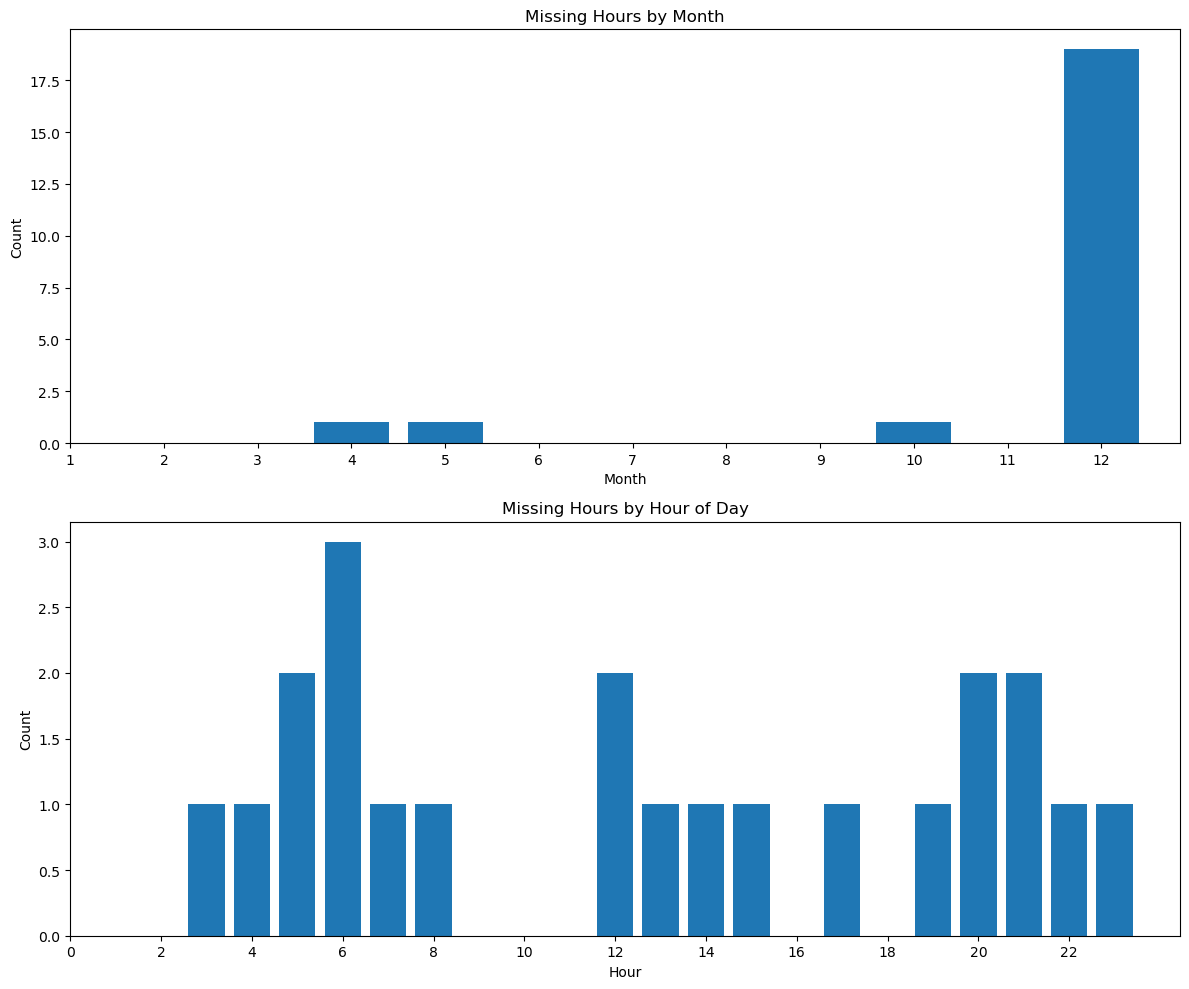

In [69]:
# 9. Identify and analyze significant gaps
if missing_after_fill.sum() > 0:
    missing_indices = hourly_data_complete.index[missing_after_fill]
    
    # Find consecutive missing hours (gaps)
    gaps = []
    if len(missing_indices) > 0:
        current_gap = [missing_indices[0]]
        
        for i in range(1, len(missing_indices)):
            if missing_indices[i] - missing_indices[i-1] == pd.Timedelta(hours=1):
                current_gap.append(missing_indices[i])
            else:
                if len(current_gap) > 1:  # Only record gaps of 2 or more consecutive hours
                    gaps.append((current_gap[0], current_gap[-1], len(current_gap)))
                current_gap = [missing_indices[i]]
        
        # Add the last gap if it exists
        if len(current_gap) > 1:
            gaps.append((current_gap[0], current_gap[-1], len(current_gap)))
    
    # Print information about significant gaps
    if gaps:
        print("\nSignificant gaps in the timeline:")
        for start, end, length in sorted(gaps, key=lambda x: x[2], reverse=True)[:10]:  # Show top 10 longest gaps
            print(f"Gap from {start} to {end}: {length} hours")
    
    # Analyze seasonal patterns in missing data
    if len(missing_indices) > 0:
        missing_by_month = pd.Series(missing_indices).dt.month.value_counts().sort_index()
        missing_by_hour = pd.Series(missing_indices).dt.hour.value_counts().sort_index()
        missing_by_year = pd.Series(missing_indices).dt.year.value_counts().sort_index()
        
        print("\nMissing data patterns:")
        print("By year:")
        for year, count in missing_by_year.items():
            print(f"{year}: {count} missing hours ({count/(24*365)*100:.2f}% of year)")
        
        # Create visualizations for missing data patterns
        fig, axes = plt.subplots(2, 1, figsize=(12, 10))
        
        # Plot missing by month
        axes[0].bar(missing_by_month.index, missing_by_month.values)
        axes[0].set_title('Missing Hours by Month')
        axes[0].set_xlabel('Month')
        axes[0].set_ylabel('Count')
        axes[0].set_xticks(range(1, 13))
        
        # Plot missing by hour of day
        axes[1].bar(missing_by_hour.index, missing_by_hour.values)
        axes[1].set_title('Missing Hours by Hour of Day')
        axes[1].set_xlabel('Hour')
        axes[1].set_ylabel('Count')
        axes[1].set_xticks(range(0, 24, 2))
        
        plt.tight_layout()
        plt.show()

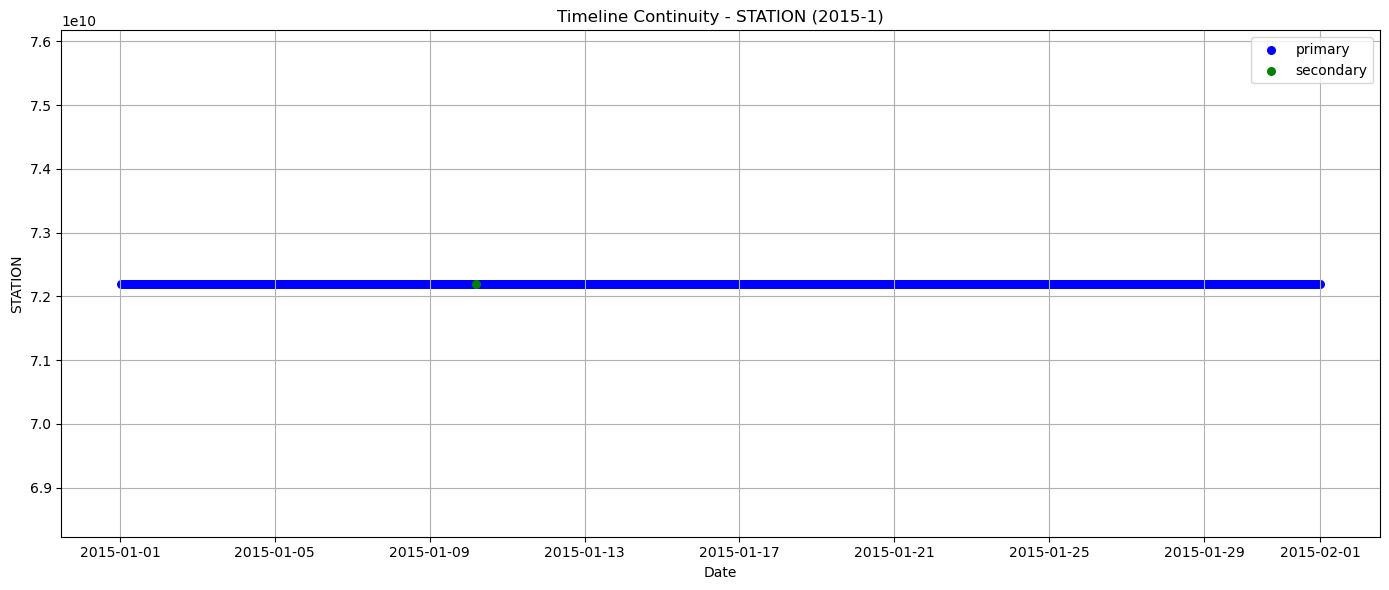

In [70]:
# 10. Visualize data continuity for a key variable
# Choose a numeric column for visualization
numeric_cols = [col for col in hourly_data_complete.columns 
                if col != 'observation_source' and pd.api.types.is_numeric_dtype(hourly_data_complete[col])]

if len(numeric_cols) > 0:
    col_to_plot = numeric_cols[0]  # Choose the first numeric column
    
    # For a more meaningful visualization, show a month of data
    sample_year = hourly_data_complete.index[0].year
    sample_month = hourly_data_complete.index[0].month
    
    sample_data = hourly_data_complete[
        (hourly_data_complete.index.year == sample_year) & 
        (hourly_data_complete.index.month == sample_month)
    ]
    
    if len(sample_data) > 0:
        # Create a color map for different observation sources
        colors = {'primary': 'blue', 'secondary': 'green', 'missing': 'red'}
        
        plt.figure(figsize=(14, 6))
        
        # Plot by observation source
        for source in ['primary', 'secondary', 'missing']:
            source_data = sample_data[sample_data['observation_source'] == source]
            if len(source_data) > 0:
                if source == 'missing':
                    # For missing data, just mark the position
                    plt.scatter(source_data.index, [np.nan] * len(source_data), 
                              marker='x', s=30, color=colors[source], label=source)
                else:
                    plt.scatter(source_data.index, source_data[col_to_plot], 
                              marker='o', s=30, color=colors[source], label=source)
        
        plt.title(f'Timeline Continuity - {col_to_plot} ({sample_year}-{sample_month})')
        plt.xlabel('Date')
        plt.ylabel(col_to_plot)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [145]:
# 11. Drop the temporary column before finalizing
if 'observation_source' in hourly_data_complete.columns:
    hourly_data_complete = hourly_data_complete.drop(columns=['observation_source'])

# 12. Check column completeness in the new dataset
missing_by_column = hourly_data_complete.isnull().sum()
print("\nMissing values by column in complete timeline:")
for col, count in missing_by_column.items():
    percent = count / len(hourly_data_complete) * 100
    print(f"{col}: {count} ({percent:.2f}%)")

# 13. Update the original hourly_data variable
hourly_data = hourly_data_complete

print("\nTimeline construction complete!")

hourly_data.to_csv('hourly_data_complete.csv', index=True)



Missing values by column in complete timeline:
STATION: 22 (0.03%)
REPORT_TYPE: 22 (0.03%)
HourlyAltimeterSetting: 22 (0.03%)
HourlyDewPointTemperature: 22 (0.03%)
HourlyDryBulbTemperature: 22 (0.03%)
HourlyPrecipitation: 22 (0.03%)
HourlyPresentWeatherType: 22 (0.03%)
HourlyPressureChange: 23 (0.03%)
HourlyPressureTendency: 22 (0.03%)
HourlyRelativeHumidity: 22 (0.03%)
HourlySeaLevelPressure: 22 (0.03%)
HourlySkyConditions: 22 (0.03%)
HourlyStationPressure: 22 (0.03%)
HourlyVisibility: 49 (0.06%)
HourlyWetBulbTemperature: 22 (0.03%)
HourlyWindDirection: 25 (0.03%)
HourlyWindGustSpeed: 42 (0.05%)
HourlyWindSpeed: 42 (0.05%)
WeatherType_Missing: 22 (0.03%)
HourlyPresentWeatherType_Missing: 22 (0.03%)
HourlyWindGustSpeed_Missing: 22 (0.03%)
HourlyPressureTendency_Missing: 22 (0.03%)
HourlyPressureChange_Missing: 22 (0.03%)
HeavyRainfall: 0 (0.00%)
HeavyRainfall_plus_1h: 1 (0.00%)
HeavyRainfall_plus_2h: 2 (0.00%)
HeavyRainfall_plus_3h: 3 (0.00%)
HeavyRainfall_Next3h: 0 (0.00%)

Timeline 

In [86]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

Analyzing precipitation distribution (in inches)...
Precipitation statistics (inches/hour):
count    87650.000000
mean         0.008395
std          0.068192
min          0.000000
50%          0.000000
90%          0.000000
95%          0.020000
97.5%        0.070000
99%          0.217200
99.5%        0.400000
max          3.330000
Name: HourlyPrecipitation, dtype: float64

For reference, in millimeters:
count    2.226310e+06
mean     2.132445e-01
std      1.732069e+00
min      0.000000e+00
50%      0.000000e+00
90%      0.000000e+00
95%      5.080000e-01
97.5%    1.778000e+00
99%      5.516880e+00
99.5%    1.016000e+01
max      8.458200e+01
Name: HourlyPrecipitation, dtype: float64

Potential heavy rainfall thresholds:
- 95th percentile from data: 0.0200 inches/hour (0.51 mm/hour)
- Meteorological standard: 0.40 inches/hour (10.16 mm/hour)

Hours exceeding 95th percentile: 3885 (4.43% of data)
Hours exceeding standard threshold: 430 (0.49% of data)

Using 95th percentile as threshold:

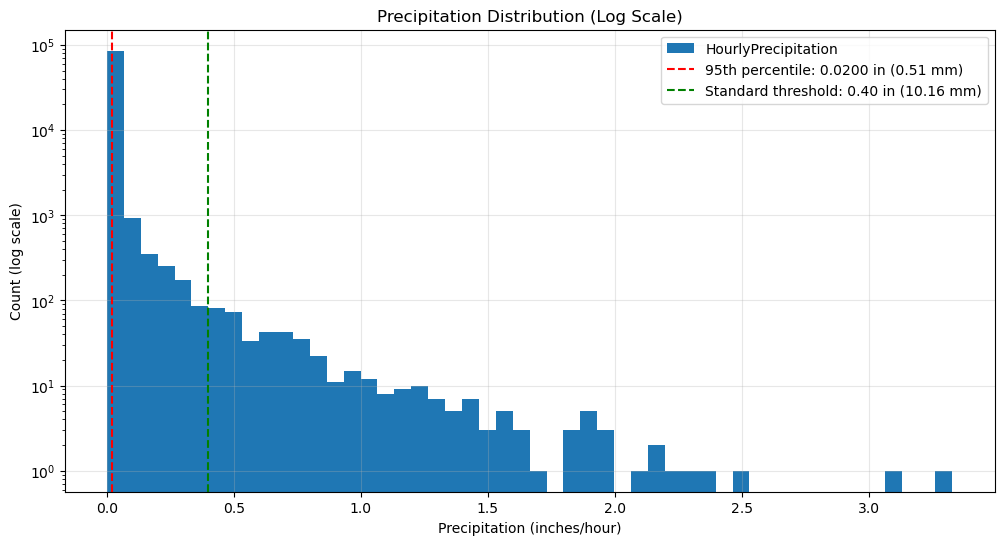

In [79]:
# 1. First, let's re-examine the precipitation distribution and confirm units
print("Analyzing precipitation distribution (in inches)...")

# Ensure the precipitation column is numeric
hourly_data['HourlyPrecipitation'] = pd.to_numeric(hourly_data['HourlyPrecipitation'], errors='coerce')

# Get basic statistics
precip_stats = hourly_data['HourlyPrecipitation'].describe(percentiles=[0.90, 0.95, 0.975, 0.99, 0.995])
print("Precipitation statistics (inches/hour):")
print(precip_stats)

# For context, also show in mm
print("\nFor reference, in millimeters:")
print(precip_stats * 25.4)  # Convert inches to mm

# We have two options for defining heavy rainfall:
# 1. Use the 95th percentile from the data
# 2. Use a meteorological standard (0.4 inches/hour or ~10mm/hour)

# Let's check both
percentile_95_threshold = hourly_data['HourlyPrecipitation'].quantile(0.95)
standard_threshold = 0.4  # 0.4 inches/hour is ~10mm/hour, a common meteorological threshold

print(f"\nPotential heavy rainfall thresholds:")
print(f"- 95th percentile from data: {percentile_95_threshold:.4f} inches/hour ({percentile_95_threshold*25.4:.2f} mm/hour)")
print(f"- Meteorological standard: {standard_threshold:.2f} inches/hour ({standard_threshold*25.4:.2f} mm/hour)")

# Check how many hours exceed each threshold
exceed_95pct = (hourly_data['HourlyPrecipitation'] > percentile_95_threshold).sum()
exceed_standard = (hourly_data['HourlyPrecipitation'] > standard_threshold).sum()

print(f"\nHours exceeding 95th percentile: {exceed_95pct} ({exceed_95pct/len(hourly_data)*100:.2f}% of data)")
print(f"Hours exceeding standard threshold: {exceed_standard} ({exceed_standard/len(hourly_data)*100:.2f}% of data)")

# Given the instruction to use the 95th percentile, we'll proceed with that
# But we'll also note the meteorological standard for reference
heavy_rain_threshold = percentile_95_threshold
print(f"\nUsing 95th percentile as threshold: {heavy_rain_threshold:.4f} inches/hour")

# Visualize the precipitation distribution
plt.figure(figsize=(12, 6))
# Plot histogram with log scale for better visualization
hourly_data['HourlyPrecipitation'].plot(kind='hist', bins=50, logy=True)
plt.axvline(x=heavy_rain_threshold, color='r', linestyle='--', 
            label=f'95th percentile: {heavy_rain_threshold:.4f} in ({heavy_rain_threshold*25.4:.2f} mm)')
plt.axvline(x=standard_threshold, color='g', linestyle='--', 
            label=f'Standard threshold: {standard_threshold:.2f} in (10.16 mm)')
plt.title('Precipitation Distribution (Log Scale)')
plt.xlabel('Precipitation (inches/hour)')
plt.ylabel('Count (log scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Using standard meteorological definition for heavy rainfall...
Heavy rainfall threshold: 0.4 inches/hour (10.16 mm/hour)
Hours with heavy rainfall: 430 (0.49% of data)


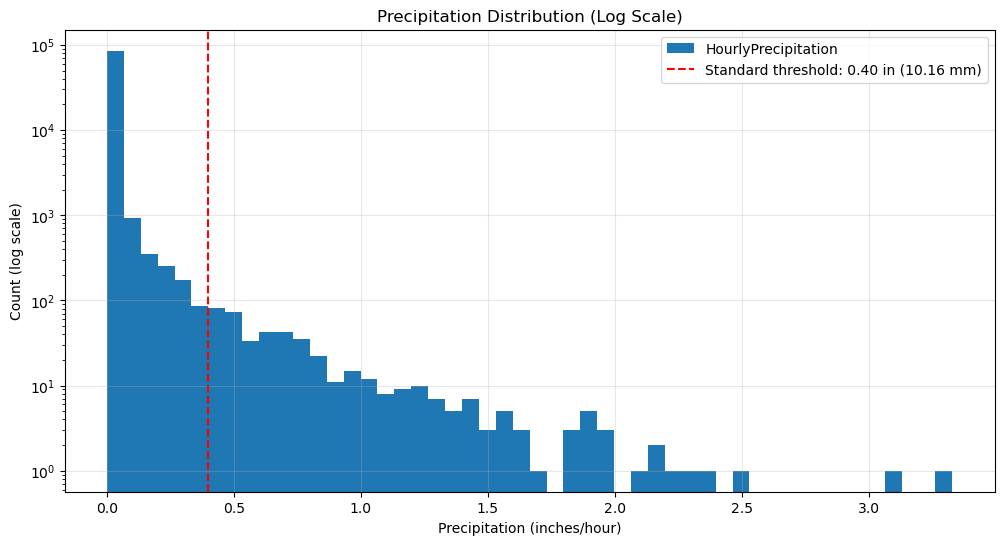

In [80]:
# 1. Set standard meteorological threshold for heavy rainfall
print("Using standard meteorological definition for heavy rainfall...")
heavy_rain_threshold = 0.4  # 0.4 inches/hour (~10 mm/hour)
print(f"Heavy rainfall threshold: {heavy_rain_threshold} inches/hour ({heavy_rain_threshold*25.4:.2f} mm/hour)")

# Ensure the precipitation column is numeric
hourly_data['HourlyPrecipitation'] = pd.to_numeric(hourly_data['HourlyPrecipitation'], errors='coerce')

# Check how many hours exceed this threshold
heavy_rain_hours = (hourly_data['HourlyPrecipitation'] > heavy_rain_threshold).sum()
print(f"Hours with heavy rainfall: {heavy_rain_hours} ({heavy_rain_hours/len(hourly_data)*100:.2f}% of data)")

# Visualize where this threshold falls in the distribution
plt.figure(figsize=(12, 6))
# Plot histogram with log scale for better visualization
hourly_data['HourlyPrecipitation'].plot(kind='hist', bins=50, logy=True)
plt.axvline(x=heavy_rain_threshold, color='r', linestyle='--', 
            label=f'Standard threshold: {heavy_rain_threshold:.2f} in ({heavy_rain_threshold*25.4:.2f} mm)')
plt.title('Precipitation Distribution (Log Scale)')
plt.xlabel('Precipitation (inches/hour)')
plt.ylabel('Count (log scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [81]:
# 2. Create forward-looking target variable for heavy rainfall in next 3 hours
print("\nCreating target variable for heavy rainfall in the next 3 hours...")

# First, create a binary indicator for heavy rainfall in the current hour
hourly_data['HeavyRainfall'] = (hourly_data['HourlyPrecipitation'] > heavy_rain_threshold).astype(int)

# Create columns for each of the next 3 hours
for i in range(1, 4):
    # Shift creates a column where each row contains the value from i rows ahead
    hourly_data[f'HeavyRainfall_plus_{i}h'] = hourly_data['HeavyRainfall'].shift(-i)

# Create the target variable: 1 if any of the next 3 hours has heavy rainfall
hourly_data['HeavyRainfall_Next3h'] = (
    (hourly_data['HeavyRainfall_plus_1h'] == 1) | 
    (hourly_data['HeavyRainfall_plus_2h'] == 1) | 
    (hourly_data['HeavyRainfall_plus_3h'] == 1)
).astype(int)

# Check for NaN values (will occur at the end of the dataset)
nan_count = hourly_data['HeavyRainfall_Next3h'].isna().sum()
print(f"NaN values in target variable (at the end of dataset): {nan_count}")

# Drop NaN values from target (these are the last 3 hours where we can't look ahead)
hourly_data = hourly_data.dropna(subset=['HeavyRainfall_Next3h'])
print(f"Dataset size after dropping rows with NaN targets: {len(hourly_data)}")


Creating target variable for heavy rainfall in the next 3 hours...
NaN values in target variable (at the end of dataset): 0
Dataset size after dropping rows with NaN targets: 87672


In [82]:
# 3. Analyze the class distribution
target_counts = hourly_data['HeavyRainfall_Next3h'].value_counts()
print("\nClass distribution for 'Heavy rainfall in next 3 hours':")
print(target_counts)
print(f"Percentage of positive class: {target_counts[1]/len(hourly_data)*100:.2f}%")
print(f"Class imbalance ratio: 1:{target_counts[0]/target_counts[1]:.1f}")


Class distribution for 'Heavy rainfall in next 3 hours':
HeavyRainfall_Next3h
0    86553
1     1119
Name: count, dtype: int64
Percentage of positive class: 1.28%
Class imbalance ratio: 1:77.3



Analyzing temporal patterns of heavy rainfall...


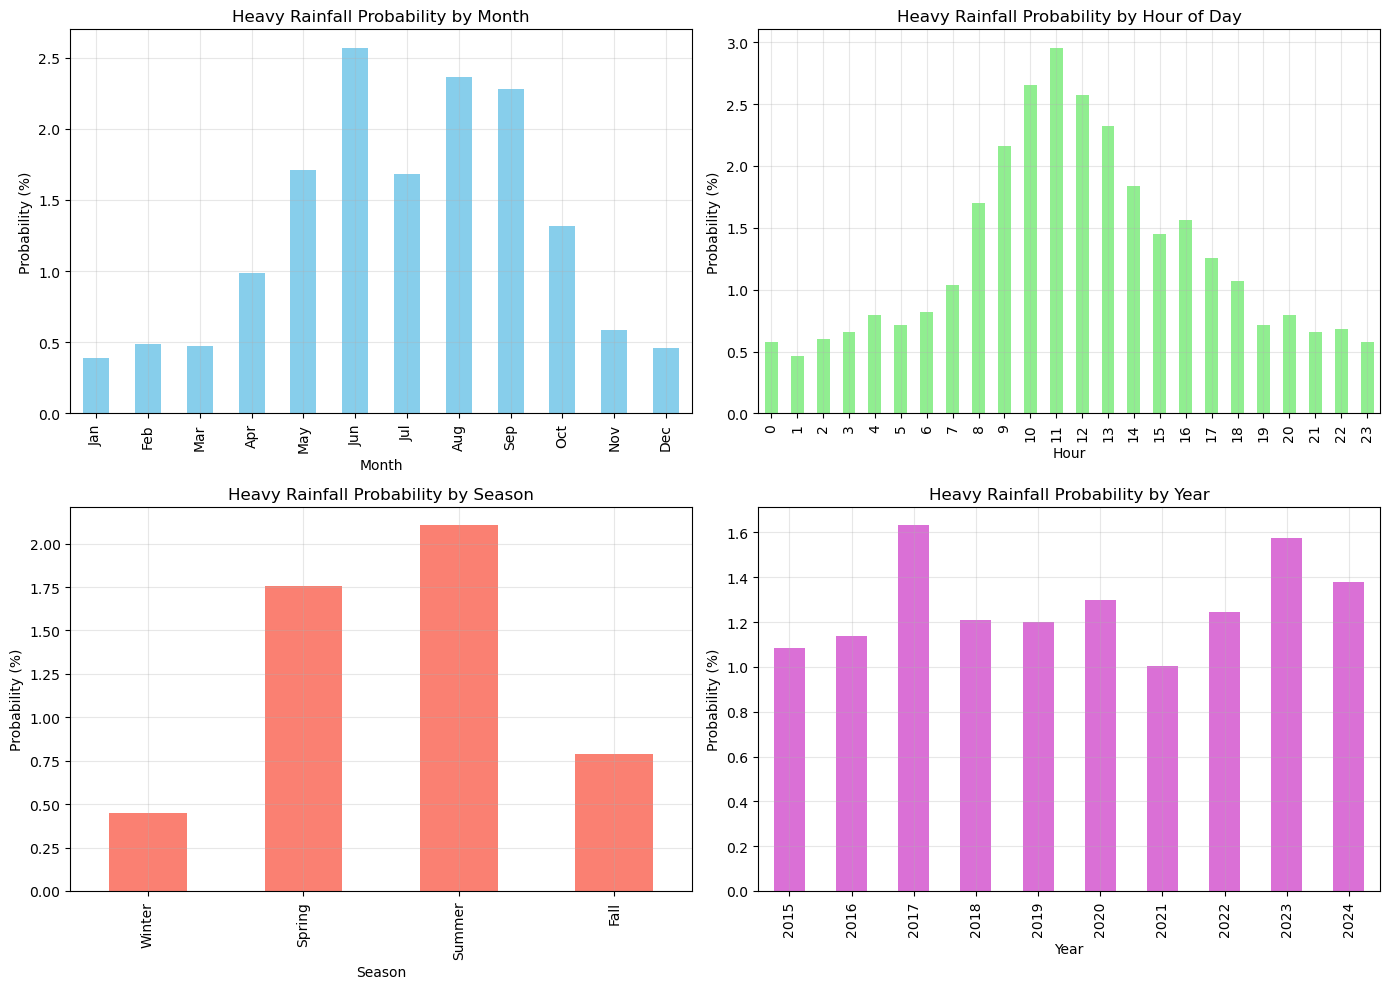

In [83]:
# 4. Examine seasonality and patterns of heavy rainfall events
print("\nAnalyzing temporal patterns of heavy rainfall...")

# Add some temporal features for analysis
hourly_data['Month'] = hourly_data.index.month
hourly_data['Hour'] = hourly_data.index.hour
hourly_data['Year'] = hourly_data.index.year
hourly_data['DayOfYear'] = hourly_data.index.dayofyear
hourly_data['Season'] = pd.cut(
    hourly_data['Month'], 
    bins=[0, 3, 6, 9, 12], 
    labels=['Winter', 'Spring', 'Summer', 'Fall'],
    include_lowest=True
)

# Plot heavy rainfall occurrence by month
plt.figure(figsize=(14, 10))

# Subplot 1: Monthly distribution
plt.subplot(2, 2, 1)
monthly_dist = hourly_data.groupby('Month')['HeavyRainfall_Next3h'].mean() * 100
monthly_dist.plot(kind='bar', color='skyblue')
plt.title('Heavy Rainfall Probability by Month')
plt.xlabel('Month')
plt.ylabel('Probability (%)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3)

# Subplot 2: Hourly distribution
plt.subplot(2, 2, 2)
hourly_dist = hourly_data.groupby('Hour')['HeavyRainfall_Next3h'].mean() * 100
hourly_dist.plot(kind='bar', color='lightgreen')
plt.title('Heavy Rainfall Probability by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Probability (%)')
plt.grid(True, alpha=0.3)

# Subplot 3: Seasonal distribution
plt.subplot(2, 2, 3)
seasonal_dist = hourly_data.groupby('Season')['HeavyRainfall_Next3h'].mean() * 100
seasonal_dist.plot(kind='bar', color='salmon')
plt.title('Heavy Rainfall Probability by Season')
plt.xlabel('Season')
plt.ylabel('Probability (%)')
plt.grid(True, alpha=0.3)

# Subplot 4: Yearly distribution
plt.subplot(2, 2, 4)
yearly_dist = hourly_data.groupby('Year')['HeavyRainfall_Next3h'].mean() * 100
yearly_dist.plot(kind='bar', color='orchid')
plt.title('Heavy Rainfall Probability by Year')
plt.xlabel('Year')
plt.ylabel('Probability (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

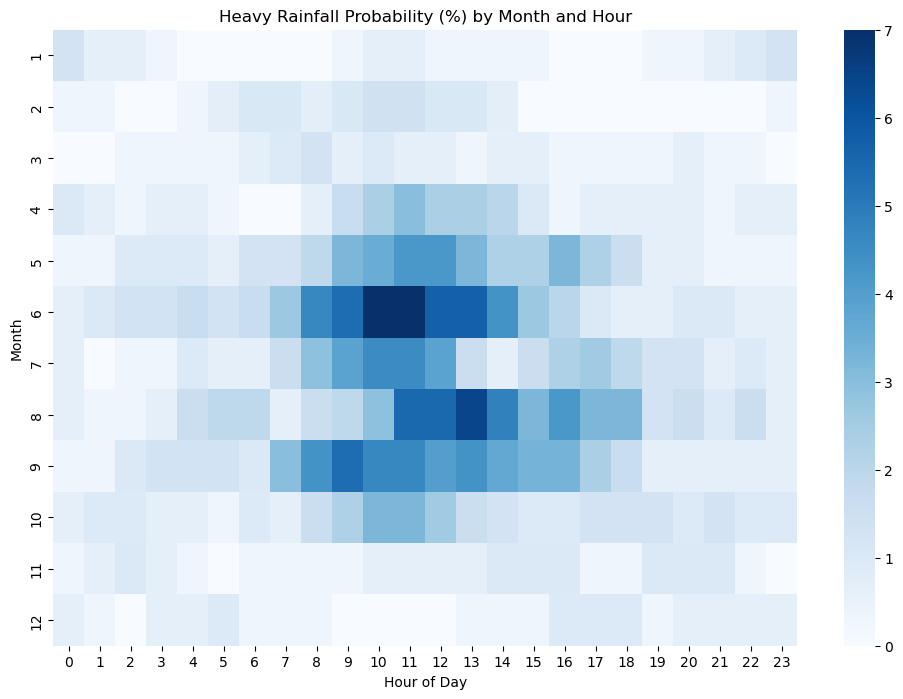

In [84]:
# 5. Show a heatmap of heavy rainfall probability by month and hour
plt.figure(figsize=(12, 8))
heatmap_data = hourly_data.pivot_table(
    index='Month', 
    columns='Hour', 
    values='HeavyRainfall_Next3h',
    aggfunc='mean'
) * 100

sns.heatmap(heatmap_data, cmap='Blues', annot=False, fmt=".1f")
plt.title('Heavy Rainfall Probability (%) by Month and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.show()

Class weights for modeling: {0: 1.0, 1: 77.3485254691689}


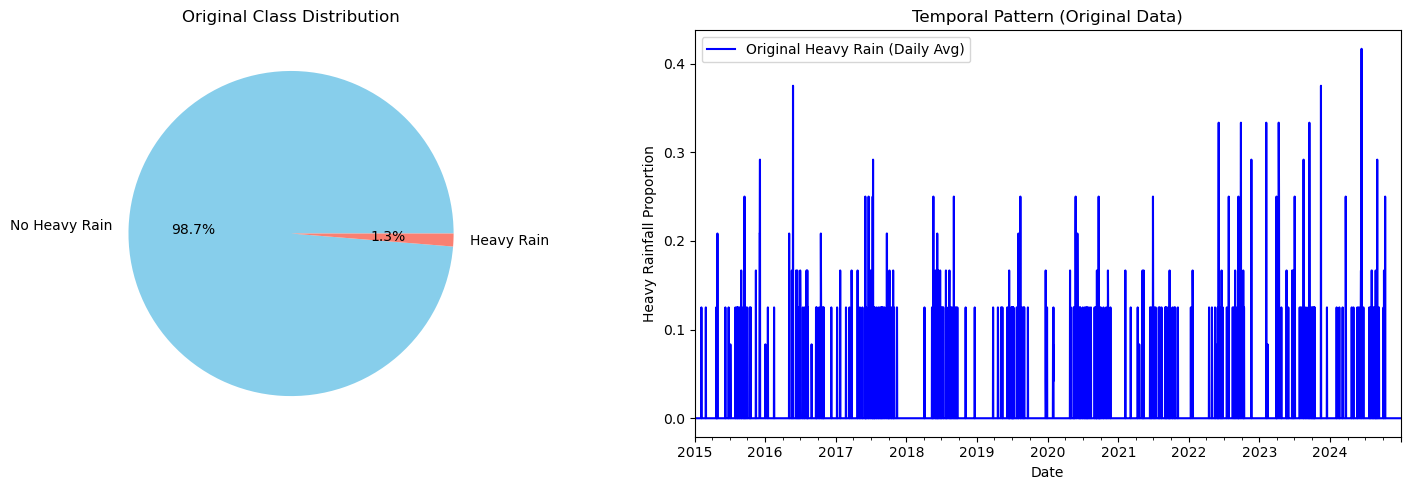

Original data shape: (87672, 33)
Original class distribution: {0: 86553, 1: 1119}


In [124]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Ensure timestamps are in datetime format
hourly_data.index = pd.to_datetime(hourly_data.index)

# Prepare features and target
analysis_cols = ['HeavyRainfall_plus_1h', 'HeavyRainfall_plus_2h', 'HeavyRainfall_plus_3h']
exclude_cols = ['HeavyRainfall_Next3h', 'HeavyRainfall', 'Month', 'Hour', 'Year', 'Season', 'DayOfYear', 
                'REPORT_TYPE', 'HourlyPresentWeatherType', 'HourlySkyConditions', 'HourlyWindDirection']
data_for_balance = hourly_data.drop(columns=analysis_cols) if all(col in hourly_data.columns for col in analysis_cols) else hourly_data.copy()
feature_cols = [col for col in data_for_balance.columns if col not in exclude_cols and data_for_balance[col].dtype in ['int64', 'float64']]
X = data_for_balance[feature_cols].copy()
y = data_for_balance['HeavyRainfall_Next3h'].copy()
X_filled = X.fillna(X.median())

# Calculate class weights for modeling
class_counts = Counter(y)
weight_for_0 = 1.0
weight_for_1 = class_counts[0] / class_counts[1]  # Approximately 86553 / 1119 ≈ 77
class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"Class weights for modeling: {class_weight}")

# Visualization (only original data, since we are not modifying it)
plt.figure(figsize=(15, 5))

# Plot 1: Original class distribution
plt.subplot(1, 2, 1)
original_counts = Counter(y)
plt.pie([original_counts[0], original_counts[1]], 
        labels=['No Heavy Rain', 'Heavy Rain'], 
        autopct='%1.1f%%',
        colors=['skyblue', 'salmon'])
plt.title('Original Class Distribution')

# Plot 2: Temporal pattern of HeavyRainfall_Next3h in original data
plt.subplot(1, 2, 2)
original_data_with_time = pd.DataFrame({'HeavyRainfall_Next3h': y}, index=hourly_data.index)
original_data_with_time.resample('D').mean().plot(
    y='HeavyRainfall_Next3h', 
    color='blue', 
    label='Original Heavy Rain (Daily Avg)',
    ax=plt.gca()
)
plt.title('Temporal Pattern (Original Data)')
plt.xlabel('Date')
plt.ylabel('Heavy Rainfall Proportion')
plt.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Original data shape: {hourly_data.shape}")
print(f"Original class distribution: {dict(Counter(y))}")

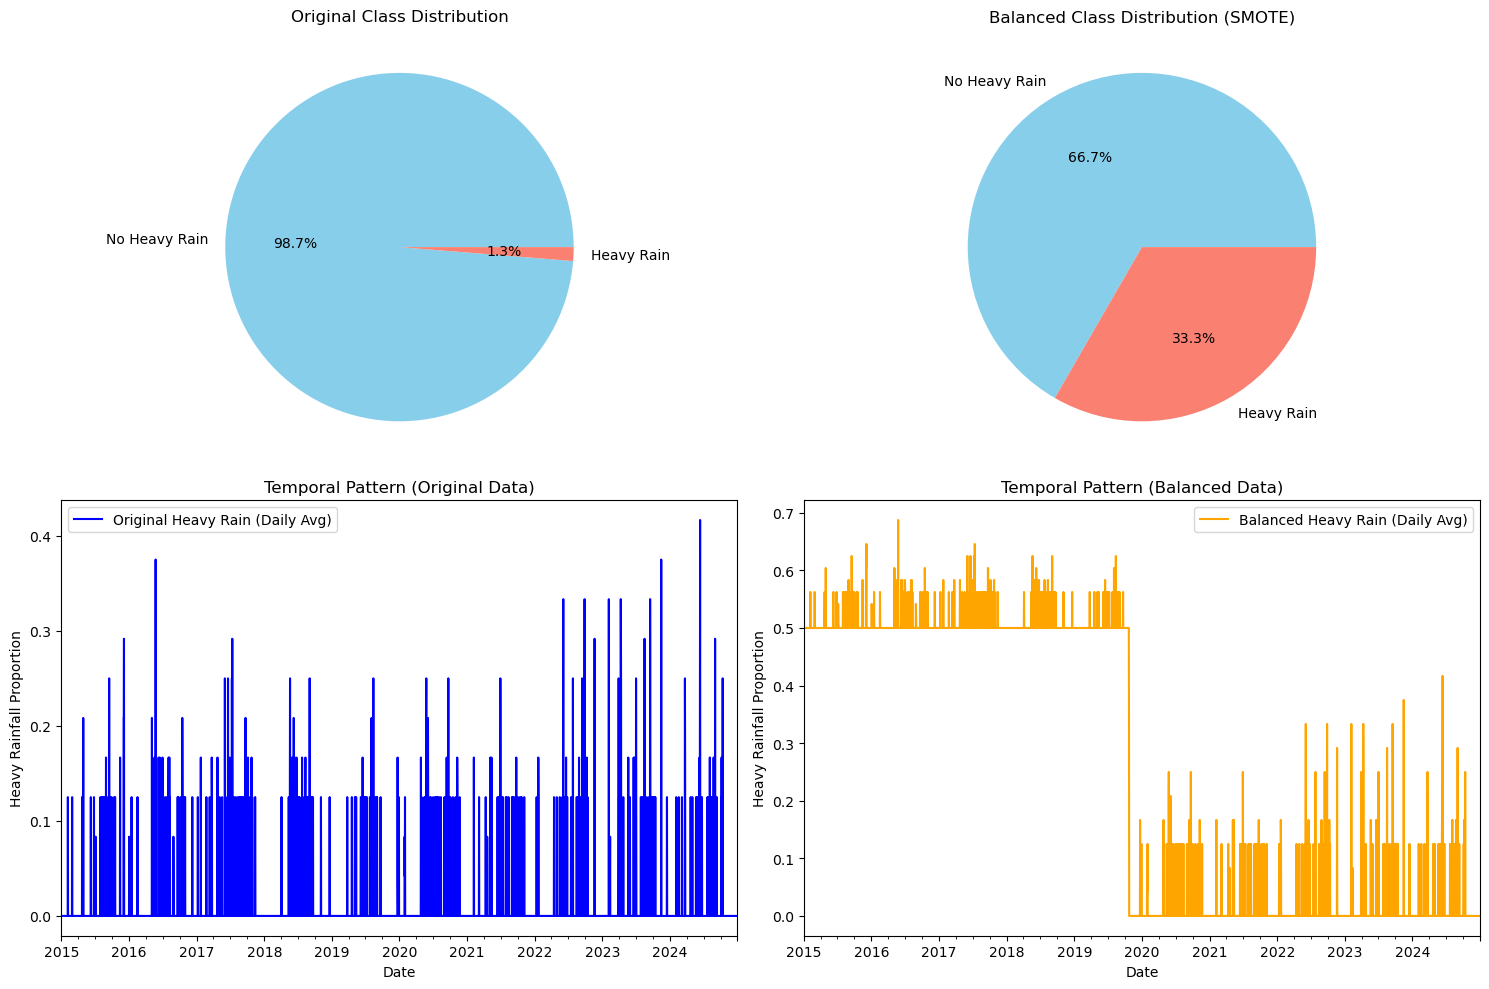

In [118]:
# 7. Analyze the temporal pattern preservation in the balanced dataset
# Note: SMOTE creates synthetic samples, so temporal integrity is not preserved
# This visualization includes class distribution change and temporal pattern analysis

import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Ensure timestamps are in datetime format
hourly_data.index = pd.to_datetime(hourly_data.index)
balanced_data.index = pd.to_datetime(balanced_data.index)

# Create figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot 1: Original class distribution (Pie chart)
plt.subplot(2, 2, 1)
original_counts = Counter(y)
plt.pie([original_counts[0], original_counts[1]], 
        labels=['No Heavy Rain', 'Heavy Rain'], 
        autopct='%1.1f%%',
        colors=['skyblue', 'salmon'])
plt.title('Original Class Distribution')

# Plot 2: Balanced class distribution (Pie chart)
plt.subplot(2, 2, 2)
balanced_counts = Counter(y_resampled)
plt.pie([balanced_counts[0], balanced_counts[1]], 
        labels=['No Heavy Rain', 'Heavy Rain'], 
        autopct='%1.1f%%',
        colors=['skyblue', 'salmon'])
plt.title('Balanced Class Distribution (SMOTE)')

# Plot 3: Temporal pattern of HeavyRainfall_Next3h in original data
plt.subplot(2, 2, 3)
original_data_with_time = pd.DataFrame({'HeavyRainfall_Next3h': y}, index=hourly_data.index)
original_data_with_time.resample('D').mean().plot(  # Daily average for clarity
    y='HeavyRainfall_Next3h', 
    color='blue', 
    label='Original Heavy Rain (Daily Avg)',
    ax=plt.gca()
)
plt.title('Temporal Pattern (Original Data)')
plt.xlabel('Date')
plt.ylabel('Heavy Rainfall Proportion')
plt.legend()

# Plot 4: Temporal pattern of HeavyRainfall_Next3h in balanced data
plt.subplot(2, 2, 4)
balanced_data.resample('D').mean().plot(  # Daily average for clarity
    y='HeavyRainfall_Next3h', 
    color='orange', 
    label='Balanced Heavy Rain (Daily Avg)',
    ax=plt.gca()
)
plt.title('Temporal Pattern (Balanced Data)')
plt.xlabel('Date')
plt.ylabel('Heavy Rainfall Proportion')
plt.legend()

plt.tight_layout()
plt.show()

Training set: 61370 samples (70.0%)
Validation set: 13151 samples (15.0%)
Test set: 13151 samples (15.0%)

Class distribution in each split:
Training set: {0: 60619, 1: 751}
Validation set: {0: 12973, 1: 178}
Test set: {0: 12961, 1: 190}

Class weights for modeling: {0: 1.0, 1: 80.71770972037284}


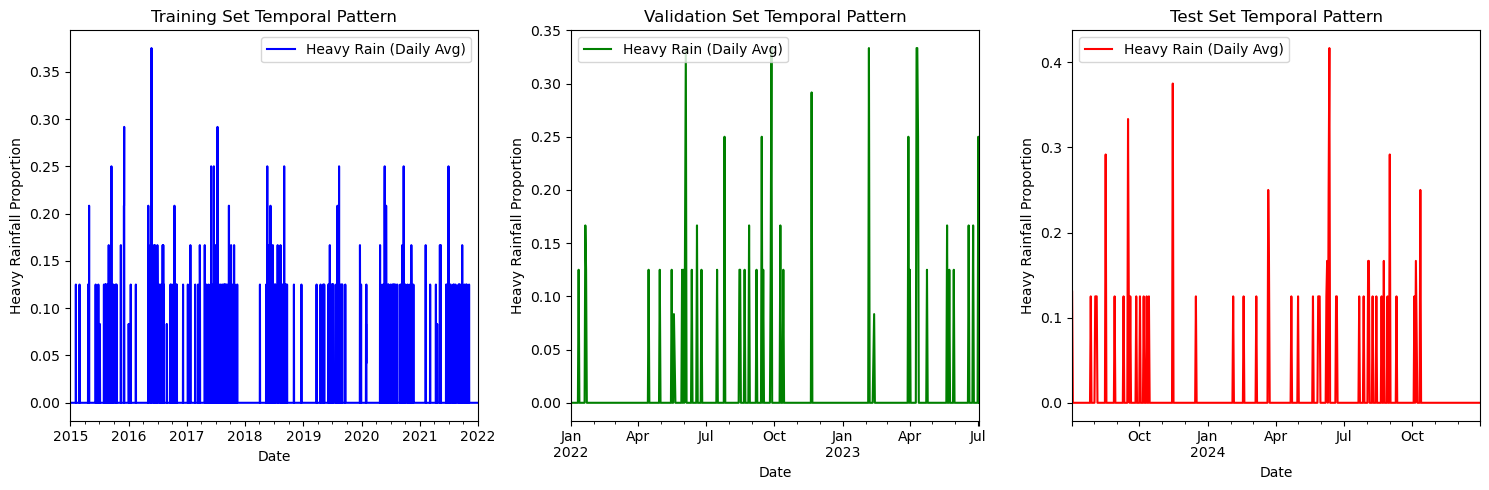

In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt

# Ensure timestamps are in datetime format
hourly_data.index = pd.to_datetime(hourly_data.index)

# Prepare features and target
analysis_cols = ['HeavyRainfall_plus_1h', 'HeavyRainfall_plus_2h', 'HeavyRainfall_plus_3h']
exclude_cols = ['HeavyRainfall_Next3h', 'HeavyRainfall', 'Month', 'Hour', 'Year', 'Season', 'DayOfYear', 
                'REPORT_TYPE', 'HourlyPresentWeatherType', 'HourlySkyConditions', 'HourlyWindDirection']
data_for_balance = hourly_data.drop(columns=analysis_cols) if all(col in hourly_data.columns for col in analysis_cols) else hourly_data.copy()
feature_cols = [col for col in data_for_balance.columns if col not in exclude_cols and data_for_balance[col].dtype in ['int64', 'float64']]
X = data_for_balance[feature_cols].copy()
y = data_for_balance['HeavyRainfall_Next3h'].copy()
X_filled = X.fillna(X.median())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# Chronological split: 70% train, 15% validation, 15% test
total_samples = len(X_scaled)
train_end = int(total_samples * 0.70)  # 70% for training
val_end = int(total_samples * 0.85)     # 15% for validation, 15% for test

# Split data chronologically
X_train = X_scaled[:train_end]
y_train = y.iloc[:train_end]
X_val = X_scaled[train_end:val_end]
y_val = y.iloc[train_end:val_end]
X_test = X_scaled[val_end:]
y_test = y.iloc[val_end:]

# Verify the splits
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/total_samples:.1%})")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/total_samples:.1%})")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/total_samples:.1%})")

# Check class distribution in each split
print("\nClass distribution in each split:")
print(f"Training set: {dict(Counter(y_train))}")
print(f"Validation set: {dict(Counter(y_val))}")
print(f"Test set: {dict(Counter(y_test))}")

# Ensure each split contains heavy rainfall events
for split_name, y_split in [('Training', y_train), ('Validation', y_val), ('Test', y_test)]:
    if 1 not in y_split.values:
        raise ValueError(f"No heavy rainfall events in {split_name} set! Consider adjusting the split.")

# Calculate class weights for modeling
class_counts = Counter(y_train)
weight_for_0 = 1.0
weight_for_1 = class_counts[0] / class_counts[1]  # Approximately 77
class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"\nClass weights for modeling: {class_weight}")

# Visualize the temporal distribution of heavy rainfall in each split
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
train_data_with_time = pd.DataFrame({'HeavyRainfall_Next3h': y_train}, index=y_train.index)
train_data_with_time.resample('D').mean().plot(
    y='HeavyRainfall_Next3h', 
    color='blue', 
    label='Heavy Rain (Daily Avg)',
    ax=plt.gca()
)
plt.title('Training Set Temporal Pattern')
plt.xlabel('Date')
plt.ylabel('Heavy Rainfall Proportion')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
val_data_with_time = pd.DataFrame({'HeavyRainfall_Next3h': y_val}, index=y_val.index)
val_data_with_time.resample('D').mean().plot(
    y='HeavyRainfall_Next3h', 
    color='green', 
    label='Heavy Rain (Daily Avg)',
    ax=plt.gca()
)
plt.title('Validation Set Temporal Pattern')
plt.xlabel('Date')
plt.ylabel('Heavy Rainfall Proportion')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
test_data_with_time = pd.DataFrame({'HeavyRainfall_Next3h': y_test}, index=y_test.index)
test_data_with_time.resample('D').mean().plot(
    y='HeavyRainfall_Next3h', 
    color='red', 
    label='Heavy Rain (Daily Avg)',
    ax=plt.gca()
)
plt.title('Test Set Temporal Pattern')
plt.xlabel('Date')
plt.ylabel('Heavy Rainfall Proportion')
plt.legend()

plt.tight_layout()
plt.show()

Feature Engineering

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure timestamps are in datetime format
hourly_data.index = pd.to_datetime(hourly_data.index)

# Step 1: Basic Features from Raw Data

# 1. Current Conditions
# Extract basic meteorological measurements
meteorological_cols = [
    'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
    'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency',
    'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure',
    'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindGustSpeed', 'HourlyWindSpeed'
]

# Convert wind direction to numeric values
# Assuming HourlyWindDirection contains degree values (0-360) or cardinal directions (e.g., 'N', 'NE')
# If it's in degrees, we can use it directly; if it's cardinal, we need to map it
def convert_wind_direction(wind_dir):
    if isinstance(wind_dir, str):
        # Map cardinal directions to degrees
        direction_map = {
            'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
            'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
            'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
            'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
        }
        return direction_map.get(wind_dir.upper(), 0)  # Default to 0 if not found
    try:
        return float(wind_dir)  # If already numeric (degrees)
    except (ValueError, TypeError):
        return 0  # Default for invalid values

hourly_data['HourlyWindDirection'] = hourly_data['HourlyWindDirection'].apply(convert_wind_direction)
meteorological_cols.append('HourlyWindDirection')

# Handle special cases in HourlyPrecipitation (e.g., "trace")
def convert_precipitation(precip):
    if isinstance(precip, str):
        if 'T' in precip.upper() or 'TRACE' in precip.upper():
            return 0.01  # Treat "trace" as a small amount (e.g., 0.01 inches)
        try:
            return float(precip)
        except ValueError:
            return 0.0  # Default for invalid strings
    return float(precip) if precip is not None else 0.0

hourly_data['HourlyPrecipitation'] = hourly_data['HourlyPrecipitation'].apply(convert_precipitation)

# Check units consistency (example: temperature columns)
# Assuming temperatures are in Fahrenheit (common in US weather data)
# If needed, convert to Celsius: (F - 32) * 5/9
# For now, assume all units are consistent (Fahrenheit for temperature, inches for precipitation, etc.)
# If you need unit conversion, let me know!

# 2. Time Features
# Extract hour, day of year, month (already present in the data)
time_cols = ['Hour', 'DayOfYear', 'Month']

# Create weekend/weekday indicator
hourly_data['IsWeekend'] = hourly_data.index.dayofweek.isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday

# Convert cyclical features to sine/cosine representations
# Hour (cycle of 24)
hourly_data['Hour_sin'] = np.sin(2 * np.pi * hourly_data['Hour'] / 24)
hourly_data['Hour_cos'] = np.cos(2 * np.pi * hourly_data['Hour'] / 24)

# DayOfYear (cycle of 365)
hourly_data['DayOfYear_sin'] = np.sin(2 * np.pi * hourly_data['DayOfYear'] / 365)
hourly_data['DayOfYear_cos'] = np.cos(2 * np.pi * hourly_data['DayOfYear'] / 365)

# Add new time features to the list
time_cols.extend(['IsWeekend', 'Hour_sin', 'Hour_cos', 'DayOfYear_sin', 'DayOfYear_cos'])

# Combine all features
feature_cols = meteorological_cols + time_cols

# Prepare final feature set and target
X = hourly_data[feature_cols].copy()
y = hourly_data['HeavyRainfall_Next3h'].copy()

# Fill missing values (if any remain)
X_filled = X.fillna(X.median())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# Chronological split: 70% train, 15% validation, 15% test (same as before)
total_samples = len(X_scaled)
train_end = int(total_samples * 0.70)
val_end = int(total_samples * 0.85)

X_train = X_scaled[:train_end]
y_train = y.iloc[:train_end]
X_val = X_scaled[train_end:val_end]
y_val = y.iloc[train_end:val_end]
X_test = X_scaled[val_end:]
y_test = y.iloc[val_end:]

# Recalculate class weights with updated training set
class_counts = Counter(y_train)
weight_for_0 = 1.0
weight_for_1 = class_counts[0] / class_counts[1]
class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"Class weights for modeling: {class_weight}")

# Verify the updated features
print("\nFinal Feature Columns:", feature_cols)
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

Class weights for modeling: {0: 1.0, 1: 80.71770972037284}

Final Feature Columns: ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindGustSpeed', 'HourlyWindSpeed', 'HourlyWindDirection', 'Hour', 'DayOfYear', 'Month', 'IsWeekend', 'Hour_sin', 'Hour_cos', 'DayOfYear_sin', 'DayOfYear_cos']
X_train shape: (61370, 22)
X_val shape: (13151, 22)
X_test shape: (13151, 22)


In [132]:
hourly_data.head()

,STATION,REPORT_TYPE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,...,Month,Hour,Year,DayOfYear,Season,IsWeekend,Hour_sin,Hour_cos,DayOfYear_sin,DayOfYear_cos
2015-01-01 00:53:00,7.220201e+10,FM-15,30.15,68.0,71.0,0.0,-RA:02 |RA |RA,0.03,6.0,90.0,...,1,0,2015,1,Winter,0,0.000000,1.000000,0.017213,0.999852
2015-01-01 01:53:00,7.220201e+10,FM-15,30.15,68.0,71.0,0.0,-RA:02 |RA |RA,NaN,0.0,90.0,...,1,1,2015,1,Winter,0,0.258819,0.965926,0.017213,0.999852
2015-01-01 02:53:00,7.220201e+10,FM-15,30.13,68.0,71.0,0.0,-RA:02 |RA |RA,-0.02,0.0,90.0,...,1,2,2015,1,Winter,0,0.500000,0.866025,0.017213,0.999852
2015-01-01 03:53:00,7.220201e+10,FM-15,30.12,68.0,71.0,0.0,-RA:02 |RA |RA,0.03,7.0,90.0,...,1,3,2015,1,Winter,0,0.707107,0.707107,0.017213,0.999852
2015-01-01 04:53:00,7.220201e+10,FM-15,30.13,68.0,71.0,0.0,BR:1 ||,0.00,0.0,90.0,...,1,4,2015,1,Winter,0,0.866025,0.500000,0.017213,0.999852


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Ensure timestamps are in datetime format
hourly_data.index = pd.to_datetime(hourly_data.index)

# Step 1: Basic Features (from previous step)
# Meteorological features
meteorological_cols = [
    'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
    'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency',
    'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure',
    'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindGustSpeed', 'HourlyWindSpeed'
]

# Convert wind direction to numeric values (already done in previous step)
def convert_wind_direction(wind_dir):
    if isinstance(wind_dir, str):
        direction_map = {
            'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
            'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
            'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
            'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
        }
        return direction_map.get(wind_dir.upper(), 0)
    try:
        return float(wind_dir)
    except (ValueError, TypeError):
        return 0

hourly_data['HourlyWindDirection'] = hourly_data['HourlyWindDirection'].apply(convert_wind_direction)
meteorological_cols.append('HourlyWindDirection')

# Handle HourlyPrecipitation (already done in previous step)
def convert_precipitation(precip):
    if isinstance(precip, str):
        if 'T' in precip.upper() or 'TRACE' in precip.upper():
            return 0.01
        try:
            return float(precip)
        except ValueError:
            return 0.0
    return float(precip) if precip is not None else 0.0

hourly_data['HourlyPrecipitation'] = hourly_data['HourlyPrecipitation'].apply(convert_precipitation)

# Time features (already done in previous step)
time_cols = ['Hour', 'DayOfYear', 'Month']
hourly_data['IsWeekend'] = hourly_data.index.dayofweek.isin([5, 6]).astype(int)
hourly_data['Hour_sin'] = np.sin(2 * np.pi * hourly_data['Hour'] / 24)
hourly_data['Hour_cos'] = np.cos(2 * np.pi * hourly_data['Hour'] / 24)
hourly_data['DayOfYear_sin'] = np.sin(2 * np.pi * hourly_data['DayOfYear'] / 365)
hourly_data['DayOfYear_cos'] = np.cos(2 * np.pi * hourly_data['DayOfYear'] / 365)
time_cols.extend(['IsWeekend', 'Hour_sin', 'Hour_cos', 'DayOfYear_sin', 'DayOfYear_cos'])

# Step 2: Derived Weather Features
# 1. Atmospheric Stability Indicators
# Convert temperatures from Fahrenheit to Celsius (since formulas use Celsius)
hourly_data['DryBulbTemp_C'] = (hourly_data['HourlyDryBulbTemperature'] - 32) * 5 / 9
hourly_data['DewPointTemp_C'] = (hourly_data['HourlyDewPointTemperature'] - 32) * 5 / 9

# Calculate Dew Point Depression
hourly_data['DewPointDepression'] = hourly_data['HourlyDryBulbTemperature'] - hourly_data['HourlyDewPointTemperature']

# Calculate Vapor Pressure (using August-Roche-Magnus approximation)
# e = 6.1078 * 10^(7.5 * Td / (237.3 + Td))
hourly_data['VaporPressure'] = 6.1078 * 10 ** (7.5 * hourly_data['DewPointTemp_C'] / (237.3 + hourly_data['DewPointTemp_C']))

# Calculate Saturation Vapor Pressure (using dry bulb temperature)
# es = 6.1078 * 10^(7.5 * T / (237.3 + T))
hourly_data['SaturationVaporPressure'] = 6.1078 * 10 ** (7.5 * hourly_data['DryBulbTemp_C'] / (237.3 + hourly_data['DryBulbTemp_C']))

# Wet-Bulb Temperature (already available as HourlyWetBulbTemperature, no need to calculate)

# Add new features to the list
derived_cols = ['DewPointDepression', 'VaporPressure', 'SaturationVaporPressure']

# 2. Wind Components
# Convert wind speed and direction to u/v components
# u = -WindSpeed * sin(WindDirection * pi/180)
# v = -WindSpeed * cos(WindDirection * pi/180)
hourly_data['Wind_U'] = -hourly_data['HourlyWindSpeed'] * np.sin(np.radians(hourly_data['HourlyWindDirection']))
hourly_data['Wind_V'] = -hourly_data['HourlyWindSpeed'] * np.cos(np.radians(hourly_data['HourlyWindDirection']))

# Add wind components to the list
derived_cols.extend(['Wind_U', 'Wind_V'])

# Combine all features
feature_cols = meteorological_cols + time_cols + derived_cols

# Prepare final feature set and target
X = hourly_data[feature_cols].copy()
y = hourly_data['HeavyRainfall_Next3h'].copy()

# Fill missing values (if any remain)
X_filled = X.fillna(X.median())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# Chronological split: 70% train, 15% validation, 15% test
total_samples = len(X_scaled)
train_end = int(total_samples * 0.70)
val_end = int(total_samples * 0.85)

X_train = X_scaled[:train_end]
y_train = y.iloc[:train_end]
X_val = X_scaled[train_end:val_end]
y_val = y.iloc[train_end:val_end]
X_test = X_scaled[val_end:]
y_test = y.iloc[val_end:]

# Recalculate class weights
class_counts = Counter(y_train)
weight_for_0 = 1.0
weight_for_1 = class_counts[0] / class_counts[1]
class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"Class weights for modeling: {class_weight}")

# Verify the updated features
print("\nFinal Feature Columns:", feature_cols)
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

Class weights for modeling: {0: 1.0, 1: 80.71770972037284}

Final Feature Columns: ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindGustSpeed', 'HourlyWindSpeed', 'HourlyWindDirection', 'Hour', 'DayOfYear', 'Month', 'IsWeekend', 'Hour_sin', 'Hour_cos', 'DayOfYear_sin', 'DayOfYear_cos', 'DewPointDepression', 'VaporPressure', 'SaturationVaporPressure', 'Wind_U', 'Wind_V']
X_train shape: (61370, 27)
X_val shape: (13151, 27)
X_test shape: (13151, 27)


In [134]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Ensure timestamps are in datetime format
hourly_data.index = pd.to_datetime(hourly_data.index)

# Step 1: Basic Features (from previous steps)
meteorological_cols = [
    'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
    'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency',
    'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure',
    'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindGustSpeed', 'HourlyWindSpeed',
    'HourlyWindDirection'
]

# Convert wind direction (already done)
def convert_wind_direction(wind_dir):
    if isinstance(wind_dir, str):
        direction_map = {
            'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
            'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
            'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
            'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
        }
        return direction_map.get(wind_dir.upper(), 0)
    try:
        return float(wind_dir)
    except (ValueError, TypeError):
        return 0

hourly_data['HourlyWindDirection'] = hourly_data['HourlyWindDirection'].apply(convert_wind_direction)

# Handle HourlyPrecipitation (already done)
def convert_precipitation(precip):
    if isinstance(precip, str):
        if 'T' in precip.upper() or 'TRACE' in precip.upper():
            return 0.01
        try:
            return float(precip)
        except ValueError:
            return 0.0
    return float(precip) if precip is not None else 0.0

hourly_data['HourlyPrecipitation'] = hourly_data['HourlyPrecipitation'].apply(convert_precipitation)

# Time features (already done)
time_cols = ['Hour', 'DayOfYear', 'Month']
hourly_data['IsWeekend'] = hourly_data.index.dayofweek.isin([5, 6]).astype(int)
hourly_data['Hour_sin'] = np.sin(2 * np.pi * hourly_data['Hour'] / 24)
hourly_data['Hour_cos'] = np.cos(2 * np.pi * hourly_data['Hour'] / 24)
hourly_data['DayOfYear_sin'] = np.sin(2 * np.pi * hourly_data['DayOfYear'] / 365)
hourly_data['DayOfYear_cos'] = np.cos(2 * np.pi * hourly_data['DayOfYear'] / 365)
time_cols.extend(['IsWeekend', 'Hour_sin', 'Hour_cos', 'DayOfYear_sin', 'DayOfYear_cos'])

# Step 2: Derived Weather Features (from previous step)
hourly_data['DryBulbTemp_C'] = (hourly_data['HourlyDryBulbTemperature'] - 32) * 5 / 9
hourly_data['DewPointTemp_C'] = (hourly_data['HourlyDewPointTemperature'] - 32) * 5 / 9
hourly_data['DewPointDepression'] = hourly_data['HourlyDryBulbTemperature'] - hourly_data['HourlyDewPointTemperature']
hourly_data['VaporPressure'] = 6.1078 * 10 ** (7.5 * hourly_data['DewPointTemp_C'] / (237.3 + hourly_data['DewPointTemp_C']))
hourly_data['SaturationVaporPressure'] = 6.1078 * 10 ** (7.5 * hourly_data['DryBulbTemp_C'] / (237.3 + hourly_data['DryBulbTemp_C']))
hourly_data['Wind_U'] = -hourly_data['HourlyWindSpeed'] * np.sin(np.radians(hourly_data['HourlyWindDirection']))
hourly_data['Wind_V'] = -hourly_data['HourlyWindSpeed'] * np.cos(np.radians(hourly_data['HourlyWindDirection']))
derived_cols = ['DewPointDepression', 'VaporPressure', 'SaturationVaporPressure', 'Wind_U', 'Wind_V']

# Step 3: Historical and Trend Features
# 1. Precipitation History
# Cumulative precipitation over various windows (3h, 6h, 12h, 24h)
windows = [3, 6, 12, 24]
for window in windows:
    hourly_data[f'CumPrecip_{window}h'] = hourly_data['HourlyPrecipitation'].rolling(window=window, min_periods=1).sum()
    hourly_data[f'MaxPrecip_{window}h'] = hourly_data['HourlyPrecipitation'].rolling(window=window, min_periods=1).max()

# Indicator for current precipitation
hourly_data['IsRaining'] = (hourly_data['HourlyPrecipitation'] > 0).astype(int)

# Hours since last rainfall
# Create a mask for rainfall events
rainfall_events = hourly_data['HourlyPrecipitation'] > 0
# Calculate time since last rainfall (in hours)
hourly_data['HoursSinceLastRain'] = np.nan
last_rain_idx = -1
for idx in range(len(hourly_data)):
    if rainfall_events.iloc[idx]:
        last_rain_idx = idx
    if last_rain_idx == -1:
        hourly_data.iloc[idx, hourly_data.columns.get_loc('HoursSinceLastRain')] = idx
    else:
        hourly_data.iloc[idx, hourly_data.columns.get_loc('HoursSinceLastRain')] = idx - last_rain_idx

# Add precipitation history features to the list
precip_cols = [f'CumPrecip_{window}h' for window in windows] + [f'MaxPrecip_{window}h' for window in windows] + ['IsRaining', 'HoursSinceLastRain']

# 2. Trend Features
# Calculate changes in key variables over different time periods (1h, 3h, 6h)
key_vars = ['HourlyDryBulbTemperature', 'HourlyDewPointTemperature', 'HourlyRelativeHumidity', 
            'HourlySeaLevelPressure', 'HourlyWindSpeed', 'HourlyPrecipitation']
trend_periods = [1, 3, 6]
trend_cols = []
for var in key_vars:
    for period in trend_periods:
        # Change over the period
        hourly_data[f'{var}_Change_{period}h'] = hourly_data[var] - hourly_data[var].shift(period)
        # Rate of change per hour
        hourly_data[f'{var}_RateChange_{period}h'] = hourly_data[f'{var}_Change_{period}h'] / period
        trend_cols.extend([f'{var}_Change_{period}h', f'{var}_RateChange_{period}h'])

# Combine all features
feature_cols = meteorological_cols + time_cols + derived_cols + precip_cols + trend_cols

# Prepare final feature set and target
X = hourly_data[feature_cols].copy()
y = hourly_data['HeavyRainfall_Next3h'].copy()

# Fill missing values
X_filled = X.fillna(X.median())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# Chronological split: 70% train, 15% validation, 15% test
total_samples = len(X_scaled)
train_end = int(total_samples * 0.70)
val_end = int(total_samples * 0.85)

X_train = X_scaled[:train_end]
y_train = y.iloc[:train_end]
X_val = X_scaled[train_end:val_end]
y_val = y.iloc[train_end:val_end]
X_test = X_scaled[val_end:]
y_test = y.iloc[val_end:]

# Recalculate class weights
class_counts = Counter(y_train)
weight_for_0 = 1.0
weight_for_1 = class_counts[0] / class_counts[1]
class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"Class weights for modeling: {class_weight}")

# Verify the updated features
print("\nFinal Feature Columns:", feature_cols)
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

Class weights for modeling: {0: 1.0, 1: 80.71770972037284}

Final Feature Columns: ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindGustSpeed', 'HourlyWindSpeed', 'HourlyWindDirection', 'Hour', 'DayOfYear', 'Month', 'IsWeekend', 'Hour_sin', 'Hour_cos', 'DayOfYear_sin', 'DayOfYear_cos', 'DewPointDepression', 'VaporPressure', 'SaturationVaporPressure', 'Wind_U', 'Wind_V', 'CumPrecip_3h', 'CumPrecip_6h', 'CumPrecip_12h', 'CumPrecip_24h', 'MaxPrecip_3h', 'MaxPrecip_6h', 'MaxPrecip_12h', 'MaxPrecip_24h', 'IsRaining', 'HoursSinceLastRain', 'HourlyDryBulbTemperature_Change_1h', 'HourlyDryBulbTemperature_RateChange_1h', 'HourlyDryBulbTemperature_Change_3h', 'HourlyDryBulbTemperature_RateChange_3h', 'HourlyDryBulbTemperature_Change_6h', 'HourlyDryBulbTemp

In [135]:
# Autoencoder-Specific Features
# 1. Normalize all features (already done with StandardScaler, but we can reapply if needed)
# We'll use the same X_scaled from Step 3, which is already standardized

# 2. Create lagged features for each variable (t-1, t-2, t-3)
lag_periods = [1, 2, 3]
lag_cols = []
for col in feature_cols:  # Use the base features from Step 3
    for lag in lag_periods:
        hourly_data[f'{col}_lag_{lag}'] = hourly_data[col].shift(lag)
        lag_cols.append(f'{col}_lag_{lag}')

# Combine all features for Autoencoder (base features + lagged features)
feature_cols_ae = feature_cols + lag_cols

# Prepare feature set for Autoencoder
X_ae = hourly_data[feature_cols_ae].copy()
y_ae = hourly_data['HeavyRainfall_Next3h'].copy()

# Fill missing values
X_ae_filled = X_ae.fillna(X_ae.median())

# Standardize features for Autoencoder
scaler_ae = StandardScaler()
X_ae_scaled = scaler_ae.fit_transform(X_ae_filled)

# Prepare sequences for Autoencoder (e.g., 24-hour windows)
timesteps = 24
X_ae_sequences = []
y_ae_sequences = []
for i in range(len(X_ae_scaled) - timesteps):
    X_ae_sequences.append(X_ae_scaled[i:i+timesteps])
    y_ae_sequences.append(y_ae.iloc[i+timesteps])
X_ae_sequences = np.array(X_ae_sequences)
y_ae_sequences = np.array(y_ae_sequences)

# Split sequences chronologically
train_end_seq = train_end - timesteps
val_end_seq = val_end - timesteps
X_train_ae_seq = X_ae_sequences[:train_end_seq]
y_train_ae_seq = y_ae_sequences[:train_end_seq]
X_val_ae_seq = X_ae_sequences[train_end_seq:val_end_seq]
y_val_ae_seq = y_ae_sequences[train_end_seq:val_end_seq]
X_test_ae_seq = X_ae_sequences[val_end_seq:]
y_test_ae_seq = y_ae_sequences[val_end_seq:]

print("\nAutoencoder Feature Columns:", feature_cols_ae)
print(f"X_train_ae_seq shape: {X_train_ae_seq.shape}")


Autoencoder Feature Columns: ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindGustSpeed', 'HourlyWindSpeed', 'HourlyWindDirection', 'Hour', 'DayOfYear', 'Month', 'IsWeekend', 'Hour_sin', 'Hour_cos', 'DayOfYear_sin', 'DayOfYear_cos', 'DewPointDepression', 'VaporPressure', 'SaturationVaporPressure', 'Wind_U', 'Wind_V', 'CumPrecip_3h', 'CumPrecip_6h', 'CumPrecip_12h', 'CumPrecip_24h', 'MaxPrecip_3h', 'MaxPrecip_6h', 'MaxPrecip_12h', 'MaxPrecip_24h', 'IsRaining', 'HoursSinceLastRain', 'HourlyDryBulbTemperature_Change_1h', 'HourlyDryBulbTemperature_RateChange_1h', 'HourlyDryBulbTemperature_Change_3h', 'HourlyDryBulbTemperature_RateChange_3h', 'HourlyDryBulbTemperature_Change_6h', 'HourlyDryBulbTemperature_RateChange_6h', 'HourlyDewPointTemperature_Ch

MODEL TRAIN

Class weights for modeling: {0: 1.0, 1: 80.71770972037284}

Feature Importance:
                 Feature    Importance
36   HoursSinceLastRain  5.204671e-02
23        VaporPressure  3.842742e-02
30        CumPrecip_24h  3.307192e-02
21        DayOfYear_cos  3.297801e-02
27         CumPrecip_3h  3.190460e-02
..                  ...           ...
17            IsWeekend  2.148759e-03
73         HighHumidity  1.360554e-03
74    RapidPressureDrop  9.372710e-21
25               Wind_U  0.000000e+00
13  HourlyWindDirection  0.000000e+00

[77 rows x 2 columns]


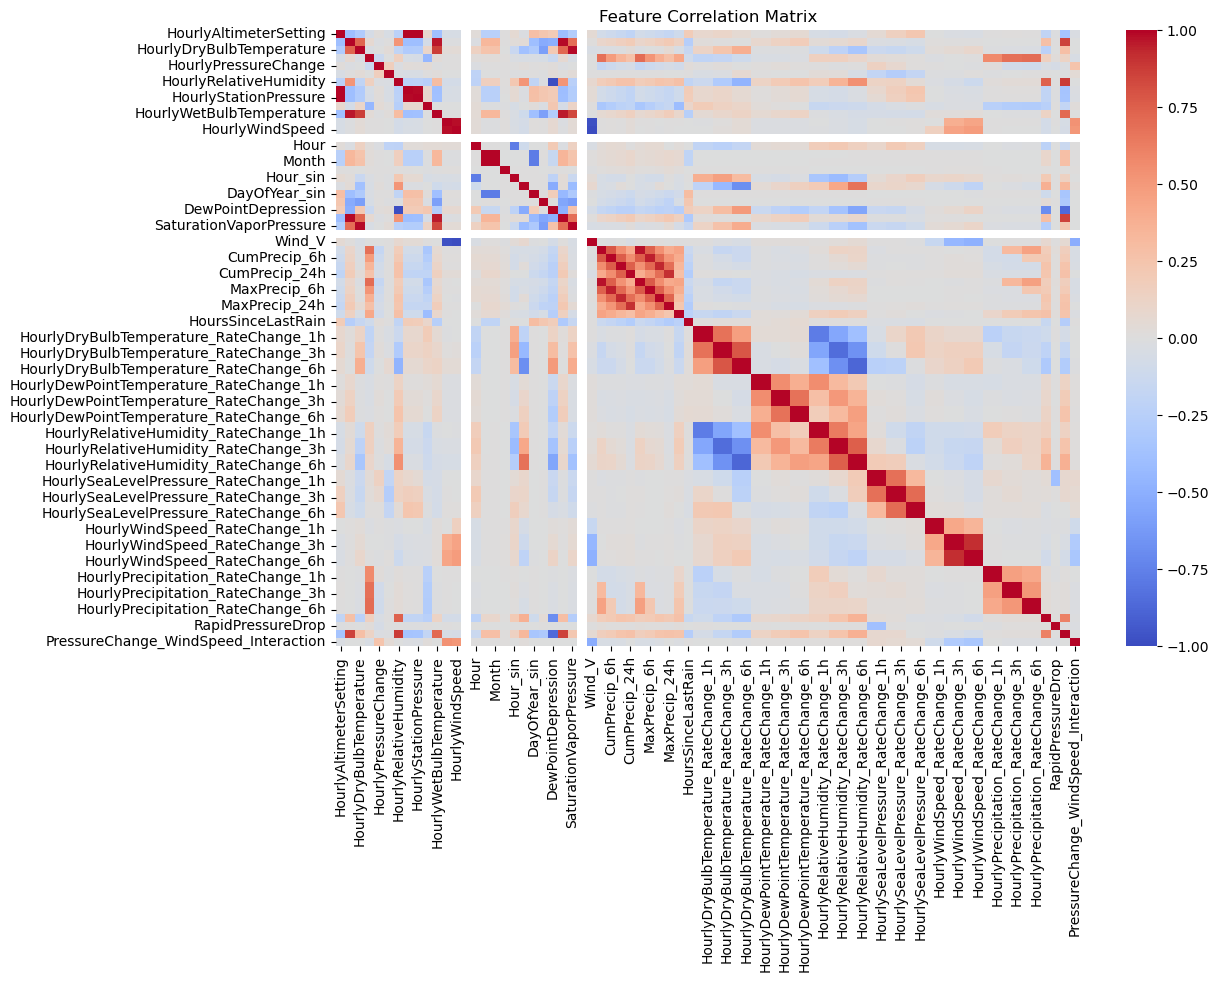


Selected Features (based on importance threshold):
 ['HoursSinceLastRain', 'VaporPressure', 'CumPrecip_24h', 'DayOfYear_cos', 'CumPrecip_3h', 'HourlyDewPointTemperature', 'MaxPrecip_24h', 'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature', 'SaturationVaporPressure', 'DayOfYear', 'HourlyPrecipitation', 'CumPrecip_6h', 'Humidity_Temperature_Interaction', 'DayOfYear_sin', 'CumPrecip_12h', 'MaxPrecip_3h', 'HourlyRelativeHumidity_Change_6h', 'HourlyAltimeterSetting']
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}

Random Forest Metrics (Validation Set):
Precision: 0.073
Recall: 0.522
F1 Score: 0.128
ROC AUC: 0.841


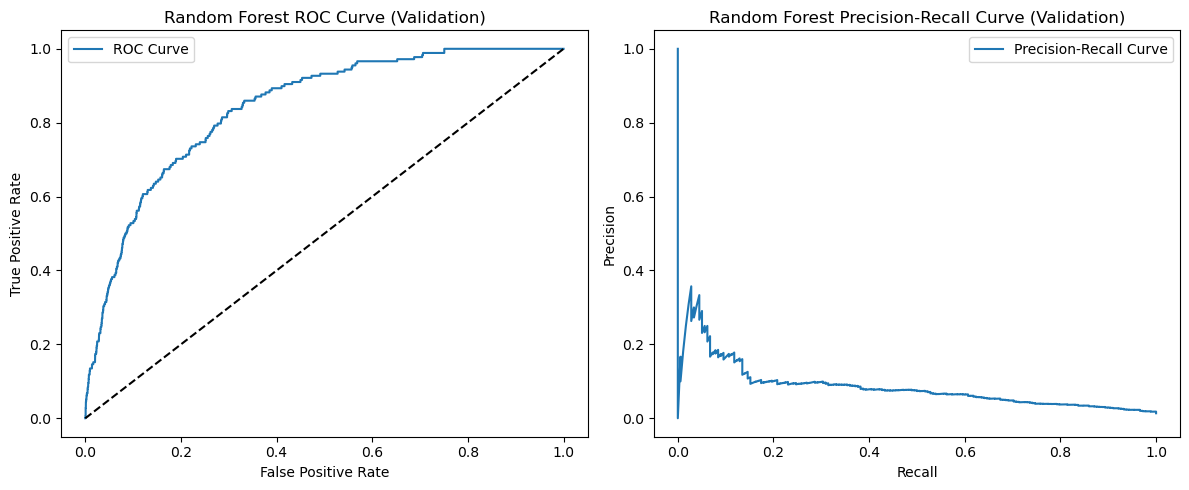


Final Feature Importance (Best Model):
                              Feature  Importance
0                 HoursSinceLastRain    0.125706
3                      DayOfYear_cos    0.065667
17  HourlyRelativeHumidity_Change_6h    0.061621
5          HourlyDewPointTemperature    0.059258
16                      MaxPrecip_3h    0.054853
8           HourlyWetBulbTemperature    0.054242
6                      MaxPrecip_24h    0.053959
1                      VaporPressure    0.053719
4                       CumPrecip_3h    0.052008
10                         DayOfYear    0.051738
9            SaturationVaporPressure    0.047837
7           HourlyDryBulbTemperature    0.047662
2                      CumPrecip_24h    0.043630
18            HourlyAltimeterSetting    0.043525
11               HourlyPrecipitation    0.042902
12                      CumPrecip_6h    0.041319
14                     DayOfYear_sin    0.039093
13  Humidity_Temperature_Interaction    0.035321
15                     CumPr

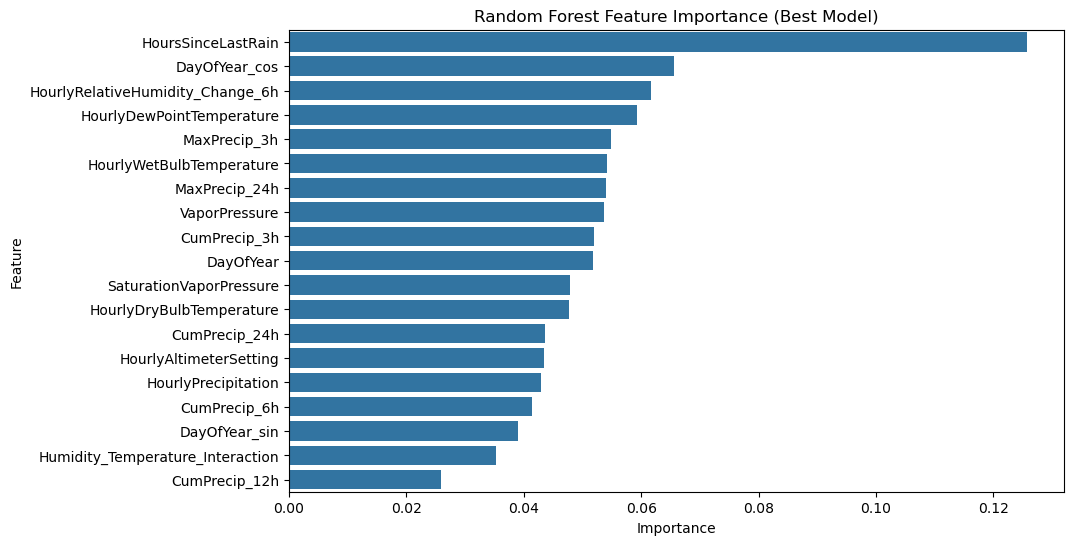

In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Ensure timestamps are in datetime format
hourly_data.index = pd.to_datetime(hourly_data.index)

# Step 1: Basic Features (from previous steps)
meteorological_cols = [
    'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
    'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency',
    'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure',
    'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindGustSpeed', 'HourlyWindSpeed',
    'HourlyWindDirection'
]

def convert_wind_direction(wind_dir):
    if isinstance(wind_dir, str):
        direction_map = {
            'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
            'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
            'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
            'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
        }
        return direction_map.get(wind_dir.upper(), 0)
    try:
        return float(wind_dir)
    except (ValueError, TypeError):
        return 0

hourly_data['HourlyWindDirection'] = hourly_data['HourlyWindDirection'].apply(convert_wind_direction)

def convert_precipitation(precip):
    if isinstance(precip, str):
        if 'T' in precip.upper() or 'TRACE' in precip.upper():
            return 0.01
        try:
            return float(precip)
        except ValueError:
            return 0.0
    return float(precip) if precip is not None else 0.0

hourly_data['HourlyPrecipitation'] = hourly_data['HourlyPrecipitation'].apply(convert_precipitation)

time_cols = ['Hour', 'DayOfYear', 'Month']
hourly_data['IsWeekend'] = hourly_data.index.dayofweek.isin([5, 6]).astype(int)
hourly_data['Hour_sin'] = np.sin(2 * np.pi * hourly_data['Hour'] / 24)
hourly_data['Hour_cos'] = np.cos(2 * np.pi * hourly_data['Hour'] / 24)
hourly_data['DayOfYear_sin'] = np.sin(2 * np.pi * hourly_data['DayOfYear'] / 365)
hourly_data['DayOfYear_cos'] = np.cos(2 * np.pi * hourly_data['DayOfYear'] / 365)
time_cols.extend(['IsWeekend', 'Hour_sin', 'Hour_cos', 'DayOfYear_sin', 'DayOfYear_cos'])

# Step 2: Derived Weather Features
hourly_data['DryBulbTemp_C'] = (hourly_data['HourlyDryBulbTemperature'] - 32) * 5 / 9
hourly_data['DewPointTemp_C'] = (hourly_data['HourlyDewPointTemperature'] - 32) * 5 / 9
hourly_data['DewPointDepression'] = hourly_data['HourlyDryBulbTemperature'] - hourly_data['HourlyDewPointTemperature']
hourly_data['VaporPressure'] = 6.1078 * 10 ** (7.5 * hourly_data['DewPointTemp_C'] / (237.3 + hourly_data['DewPointTemp_C']))
hourly_data['SaturationVaporPressure'] = 6.1078 * 10 ** (7.5 * hourly_data['DryBulbTemp_C'] / (237.3 + hourly_data['DryBulbTemp_C']))
hourly_data['Wind_U'] = -hourly_data['HourlyWindSpeed'] * np.sin(np.radians(hourly_data['HourlyWindDirection']))
hourly_data['Wind_V'] = -hourly_data['HourlyWindSpeed'] * np.cos(np.radians(hourly_data['HourlyWindDirection']))
derived_cols = ['DewPointDepression', 'VaporPressure', 'SaturationVaporPressure', 'Wind_U', 'Wind_V']

# Step 3: Historical and Trend Features
windows = [3, 6, 12, 24]
for window in windows:
    hourly_data[f'CumPrecip_{window}h'] = hourly_data['HourlyPrecipitation'].rolling(window=window, min_periods=1).sum()
    hourly_data[f'MaxPrecip_{window}h'] = hourly_data['HourlyPrecipitation'].rolling(window=window, min_periods=1).max()
hourly_data['IsRaining'] = (hourly_data['HourlyPrecipitation'] > 0).astype(int)
hourly_data['HoursSinceLastRain'] = np.nan
rainfall_events = hourly_data['HourlyPrecipitation'] > 0
last_rain_idx = -1
for idx in range(len(hourly_data)):
    if rainfall_events.iloc[idx]:
        last_rain_idx = idx
    if last_rain_idx == -1:
        hourly_data.iloc[idx, hourly_data.columns.get_loc('HoursSinceLastRain')] = idx
    else:
        hourly_data.iloc[idx, hourly_data.columns.get_loc('HoursSinceLastRain')] = idx - last_rain_idx
precip_cols = [f'CumPrecip_{window}h' for window in windows] + [f'MaxPrecip_{window}h' for window in windows] + ['IsRaining', 'HoursSinceLastRain']

key_vars = ['HourlyDryBulbTemperature', 'HourlyDewPointTemperature', 'HourlyRelativeHumidity', 
            'HourlySeaLevelPressure', 'HourlyWindSpeed', 'HourlyPrecipitation']
trend_periods = [1, 3, 6]
trend_cols = []
for var in key_vars:
    for period in trend_periods:
        hourly_data[f'{var}_Change_{period}h'] = hourly_data[var] - hourly_data[var].shift(period)
        hourly_data[f'{var}_RateChange_{period}h'] = hourly_data[f'{var}_Change_{period}h'] / period
        trend_cols.extend([f'{var}_Change_{period}h', f'{var}_RateChange_{period}h'])

# Step 4: Random Forest-Specific Features
hourly_data['HighHumidity'] = (hourly_data['HourlyRelativeHumidity'] > 80).astype(int)
hourly_data['RapidPressureDrop'] = (hourly_data['HourlySeaLevelPressure'].diff() < -0.5).astype(int)
hourly_data['Humidity_Temperature_Interaction'] = hourly_data['HourlyRelativeHumidity'] * hourly_data['HourlyDryBulbTemperature']
hourly_data['PressureChange_WindSpeed_Interaction'] = hourly_data['HourlyPressureChange'] * hourly_data['HourlyWindSpeed']
rf_specific_cols = ['HighHumidity', 'RapidPressureDrop', 'Humidity_Temperature_Interaction', 'PressureChange_WindSpeed_Interaction']

# Combine all features for Random Forest
feature_cols = meteorological_cols + time_cols + derived_cols + precip_cols + trend_cols + rf_specific_cols

# Prepare feature set for Random Forest
X = hourly_data[feature_cols].copy()
y = hourly_data['HeavyRainfall_Next3h'].copy()

# Fill missing values
X_filled = X.fillna(X.median())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# Chronological split: 70% train, 15% validation, 15% test
total_samples = len(X_scaled)
train_end = int(total_samples * 0.70)
val_end = int(total_samples * 0.85)

X_train = X_scaled[:train_end]
y_train = y.iloc[:train_end]
X_val = X_scaled[train_end:val_end]
y_val = y.iloc[train_end:val_end]
X_test = X_scaled[val_end:]
y_test = y.iloc[val_end:]

# Recalculate class weights
class_counts = Counter(y_train)
weight_for_0 = 1.0
weight_for_1 = class_counts[0] / class_counts[1]
class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"Class weights for modeling: {class_weight}")

# Random Forest Model Implementation
# 1. Feature Selection
# Initial Random Forest for feature importance
rf_initial = RandomForestClassifier(random_state=42, class_weight=class_weight)
rf_initial.fit(X_train, y_train)

# Feature importance
importances = rf_initial.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance_df)

# Check correlation among features to reduce redundancy
correlation_matrix = pd.DataFrame(X_train, columns=feature_cols).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Select features based on importance threshold (e.g., top 20 features)
importance_threshold = feature_importance_df['Importance'].quantile(0.75)  # Top 25% features
selected_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature'].tolist()
print("\nSelected Features (based on importance threshold):\n", selected_features)

# Update X_train, X_val, and X_test with selected features
selected_indices = [feature_cols.index(f) for f in selected_features]
X_train_selected = X_train[:, selected_indices]
X_val_selected = X_val[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# 2. Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42, class_weight=class_weight)
tscv = TimeSeriesSplit(n_splits=5)
rf_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=tscv, scoring='f1', random_state=42, verbose=1)
rf_search.fit(X_train_selected, y_train)

# Best model
rf_best = rf_search.best_estimator_
print("\nBest Random Forest Parameters:", rf_search.best_params_)

# 3. Model Evaluation
# Predictions on validation set
y_pred_rf_val = rf_best.predict(X_val_selected)
y_pred_proba_rf_val = rf_best.predict_proba(X_val_selected)[:, 1]

# Comprehensive metrics
print("\nRandom Forest Metrics (Validation Set):")
print(f"Precision: {precision_score(y_val, y_pred_rf_val):.3f}")
print(f"Recall: {recall_score(y_val, y_pred_rf_val):.3f}")
print(f"F1 Score: {f1_score(y_val, y_pred_rf_val):.3f}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred_proba_rf_val):.3f}")

# ROC and Precision-Recall Curves
fpr, tpr, _ = roc_curve(y_val, y_pred_proba_rf_val)
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba_rf_val)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (Validation)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve (Validation)')
plt.legend()
plt.tight_layout()
plt.show()

# Analyze feature importance of the final model
final_importances = rf_best.feature_importances_
final_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': final_importances})
final_importance_df = final_importance_df.sort_values(by='Importance', ascending=False)
print("\nFinal Feature Importance (Best Model):\n", final_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=final_importance_df)
plt.title('Random Forest Feature Importance (Best Model)')
plt.show()


X_train_ae_seq shape: (61346, 24, 292)
X_val_ae_seq shape: (13151, 24, 292)
X_test_ae_seq shape: (13151, 24, 292)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 24, 292)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 24, 32)         │        28,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 12, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 24, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 24, 16)         │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d (UpSampling1D)    │ (None, 48, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 48, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 48, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 24, 292)        │         9,636 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,260 (180.70 KB)

 Trainable params: 46,260 (180.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - loss: 0.8792 - val_loss: 0.6355
Epoch 2/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 0.8515 - val_loss: 0.6256
Epoch 3/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - loss: 0.7947 - val_loss: 0.6084
Epoch 4/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - loss: 0.8130 - val_loss: 0.5916
Epoch 5/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 61s 40ms/step - loss: 0.7624 - val_loss: 0.5837
Epoch 6/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 0.7763 - val_loss: 0.5903
Epoch 7/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - loss: 0.7440 - val_loss: 0.5837
Epoch 8/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 0.7495 - val_loss: 0.5676
Epoch 9/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - loss: 0.7734 - val_loss: 0.5696
Epoch 10/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 0.7465 - val_loss: 0.5631
Epoch 11/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - loss: 0.7514 - val_loss: 0.5638
Epoch 12

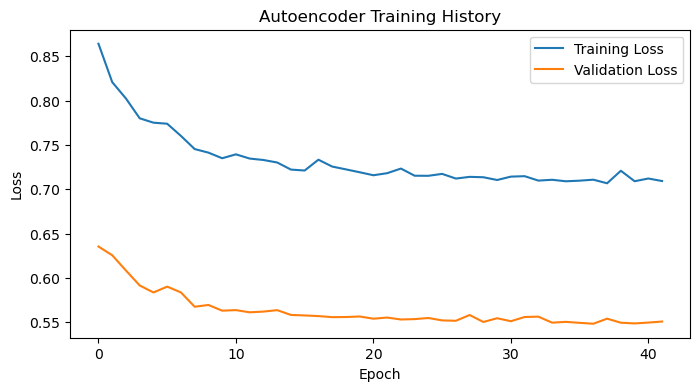

411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
1894/1894 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step
Anomaly Detection Threshold (95th percentile): 1.2548413919489765

Autoencoder Metrics (Validation Set, Default Threshold):
Precision: 0.049
Recall: 0.180
F1 Score: 0.077
ROC AUC: 0.664

Best threshold for F1: 0.1502730765849447

Autoencoder Metrics (Validation Set, Optimized Threshold):
Precision: 0.014
Recall: 1.000
F1 Score: 0.027
ROC AUC: 0.664


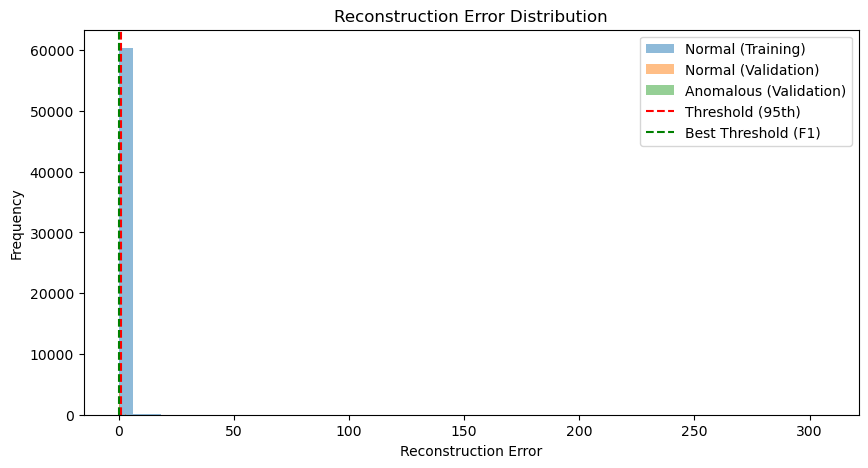


Total runtime: 1620.14 seconds


In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, RepeatVector, TimeDistributed, Conv1D, MaxPooling1D, UpSampling1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from collections import Counter
import time

# Start timing
start_time = time.time()

# Ensure timestamps are in datetime format
hourly_data.index = pd.to_datetime(hourly_data.index)

# Step 1: Basic Features (from previous steps)
meteorological_cols = [
    'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
    'HourlyPrecipitation', 'HourlyPressureChange', 'HourlyPressureTendency',
    'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlyStationPressure',
    'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindGustSpeed', 'HourlyWindSpeed',
    'HourlyWindDirection'
]

def convert_wind_direction(wind_dir):
    if isinstance(wind_dir, str):
        direction_map = {
            'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
            'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
            'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
            'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
        }
        return direction_map.get(wind_dir.upper(), 0)
    try:
        return float(wind_dir)
    except (ValueError, TypeError):
        return 0

hourly_data['HourlyWindDirection'] = hourly_data['HourlyWindDirection'].apply(convert_wind_direction)

def convert_precipitation(precip):
    if isinstance(precip, str):
        if 'T' in precip.upper() or 'TRACE' in precip.upper():
            return 0.01
        try:
            return float(precip)
        except ValueError:
            return 0.0
    return float(precip) if precip is not None else 0.0

hourly_data['HourlyPrecipitation'] = hourly_data['HourlyPrecipitation'].apply(convert_precipitation)

time_cols = ['Hour', 'DayOfYear', 'Month']
hourly_data['IsWeekend'] = hourly_data.index.dayofweek.isin([5, 6]).astype(int)
hourly_data['Hour_sin'] = np.sin(2 * np.pi * hourly_data['Hour'] / 24)
hourly_data['Hour_cos'] = np.cos(2 * np.pi * hourly_data['Hour'] / 24)
hourly_data['DayOfYear_sin'] = np.sin(2 * np.pi * hourly_data['DayOfYear'] / 365)
hourly_data['DayOfYear_cos'] = np.cos(2 * np.pi * hourly_data['DayOfYear'] / 365)
time_cols.extend(['IsWeekend', 'Hour_sin', 'Hour_cos', 'DayOfYear_sin', 'DayOfYear_cos'])

# Step 2: Derived Weather Features
hourly_data['DryBulbTemp_C'] = (hourly_data['HourlyDryBulbTemperature'] - 32) * 5 / 9
hourly_data['DewPointTemp_C'] = (hourly_data['HourlyDewPointTemperature'] - 32) * 5 / 9
hourly_data['DewPointDepression'] = hourly_data['HourlyDryBulbTemperature'] - hourly_data['HourlyDewPointTemperature']
hourly_data['VaporPressure'] = 6.1078 * 10 ** (7.5 * hourly_data['DewPointTemp_C'] / (237.3 + hourly_data['DewPointTemp_C']))
hourly_data['SaturationVaporPressure'] = 6.1078 * 10 ** (7.5 * hourly_data['DryBulbTemp_C'] / (237.3 + hourly_data['DryBulbTemp_C']))
hourly_data['Wind_U'] = -hourly_data['HourlyWindSpeed'] * np.sin(np.radians(hourly_data['HourlyWindDirection']))
hourly_data['Wind_V'] = -hourly_data['HourlyWindSpeed'] * np.cos(np.radians(hourly_data['HourlyWindDirection']))
derived_cols = ['DewPointDepression', 'VaporPressure', 'SaturationVaporPressure', 'Wind_U', 'Wind_V']

# Step 3: Historical and Trend Features
windows = [3, 6, 12, 24]
for window in windows:
    hourly_data[f'CumPrecip_{window}h'] = hourly_data['HourlyPrecipitation'].rolling(window=window, min_periods=1).sum()
    hourly_data[f'MaxPrecip_{window}h'] = hourly_data['HourlyPrecipitation'].rolling(window=window, min_periods=1).max()
hourly_data['IsRaining'] = (hourly_data['HourlyPrecipitation'] > 0).astype(int)
hourly_data['HoursSinceLastRain'] = np.nan
rainfall_events = hourly_data['HourlyPrecipitation'] > 0
last_rain_idx = -1
for idx in range(len(hourly_data)):
    if rainfall_events.iloc[idx]:
        last_rain_idx = idx
    if last_rain_idx == -1:
        hourly_data.iloc[idx, hourly_data.columns.get_loc('HoursSinceLastRain')] = idx
    else:
        hourly_data.iloc[idx, hourly_data.columns.get_loc('HoursSinceLastRain')] = idx - last_rain_idx
precip_cols = [f'CumPrecip_{window}h' for window in windows] + [f'MaxPrecip_{window}h' for window in windows] + ['IsRaining', 'HoursSinceLastRain']

key_vars = ['HourlyDryBulbTemperature', 'HourlyDewPointTemperature', 'HourlyRelativeHumidity', 
            'HourlySeaLevelPressure', 'HourlyWindSpeed', 'HourlyPrecipitation']
trend_periods = [1, 3, 6]
trend_cols = []
for var in key_vars:
    for period in trend_periods:
        hourly_data[f'{var}_Change_{period}h'] = hourly_data[var] - hourly_data[var].shift(period)
        hourly_data[f'{var}_RateChange_{period}h'] = hourly_data[f'{var}_Change_{period}h'] / period
        trend_cols.extend([f'{var}_Change_{period}h', f'{var}_RateChange_{period}h'])

# Step 4: Autoencoder-Specific Features
feature_cols = meteorological_cols + time_cols + derived_cols + precip_cols + trend_cols
lag_periods = [1, 2, 3]
lag_cols = []
for col in feature_cols:
    for lag in lag_periods:
        hourly_data[f'{col}_lag_{lag}'] = hourly_data[col].shift(lag)
        lag_cols.append(f'{col}_lag_{lag}')

feature_cols_ae = feature_cols + lag_cols

# Prepare feature set for Autoencoder
X_ae = hourly_data[feature_cols_ae].copy()
y_ae = hourly_data['HeavyRainfall_Next3h'].copy()

# Fill missing values
X_ae_filled = X_ae.fillna(X_ae.median())

# Standardize features for Autoencoder
scaler_ae = StandardScaler()
X_ae_scaled = scaler_ae.fit_transform(X_ae_filled)

# Create sequences of observations (24-hour windows)
timesteps = 24
X_ae_sequences = []
y_ae_sequences = []
for i in range(len(X_ae_scaled) - timesteps):
    X_ae_sequences.append(X_ae_scaled[i:i+timesteps])
    y_ae_sequences.append(y_ae.iloc[i+timesteps])
X_ae_sequences = np.array(X_ae_sequences)
y_ae_sequences = np.array(y_ae_sequences)

# Chronological split: 70% train, 15% validation, 15% test
total_samples = len(X_ae_scaled)
train_end = int(total_samples * 0.70)
val_end = int(total_samples * 0.85)
train_end_seq = train_end - timesteps
val_end_seq = val_end - timesteps

X_train_ae_seq = X_ae_sequences[:train_end_seq]
y_train_ae_seq = y_ae_sequences[:train_end_seq]
X_val_ae_seq = X_ae_sequences[train_end_seq:val_end_seq]
y_val_ae_seq = y_ae_sequences[train_end_seq:val_end_seq]
X_test_ae_seq = X_ae_sequences[val_end_seq:]
y_test_ae_seq = y_ae_sequences[val_end_seq:]

# Train Autoencoder only on normal data (HeavyRainfall_Next3h=0)
normal_indices = np.where(y_train_ae_seq == 0)[0]
X_train_normal = X_train_ae_seq[normal_indices]

print(f"\nX_train_ae_seq shape: {X_train_ae_seq.shape}")
print(f"X_val_ae_seq shape: {X_val_ae_seq.shape}")
print(f"X_test_ae_seq shape: {X_test_ae_seq.shape}")

# Autoencoder Architecture
input_dim = X_train_normal.shape[2]  # Number of features (292)
timesteps = 24
latent_dim = 16  # Latent dimension (compression ratio ~18:1)

# Define the architecture with CNN layers for temporal patterns
input_layer = Input(shape=(timesteps, input_dim))
# Encoder
x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)  # Shape: (None, 24, 32)
x = MaxPooling1D(pool_size=2)(x)  # Shape: (None, 12, 32)
x = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(x)  # Shape: (None, 12, 16)
x = MaxPooling1D(pool_size=2)(x)  # Shape: (None, 6, 16)
# Flatten the time and feature dimensions
x = Flatten()(x)  # Shape: (None, 6*16) = (None, 96)
# Latent space
x = Dense(latent_dim, activation='relu')(x)  # Shape: (None, 16)
encoded = RepeatVector(timesteps)(x)  # Shape: (None, 24, 16)
# Decoder
x = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(encoded)  # Shape: (None, 24, 16)
x = UpSampling1D(size=2)(x)  # Shape: (None, 48, 16)
x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(x)  # Shape: (None, 48, 32)
# Adjust the output shape to match input timesteps
x = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(x)  # Shape: (None, 48, 32)
x = MaxPooling1D(pool_size=2)(x)  # Shape: (None, 24, 32)  # Match timesteps=24
decoded = TimeDistributed(Dense(input_dim))(x)  # Shape: (None, 24, input_dim)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# Model Training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = autoencoder.fit(X_train_normal, X_train_normal, 
                          epochs=50, 
                          batch_size=32, 
                          validation_split=0.2, 
                          callbacks=[early_stopping], 
                          verbose=1)

# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Training History')
plt.legend()
plt.show()

# Anomaly Detection
# Calculate reconstruction errors on validation set
reconstructions = autoencoder.predict(X_val_ae_seq)
reconstruction_errors = np.mean(np.square(X_val_ae_seq - reconstructions), axis=(1, 2))

# Determine threshold (percentile-based, e.g., 95th percentile of normal data errors)
normal_reconstructions = autoencoder.predict(X_train_normal)
normal_errors = np.mean(np.square(X_train_normal - normal_reconstructions), axis=(1, 2))
threshold = np.percentile(normal_errors, 95)
print(f"Anomaly Detection Threshold (95th percentile): {threshold}")

# Convert errors to binary predictions
y_pred_ae = (reconstruction_errors > threshold).astype(int)

# Evaluate using classification metrics
print("\nAutoencoder Metrics (Validation Set, Default Threshold):")
print(f"Precision: {precision_score(y_val_ae_seq, y_pred_ae):.3f}")
print(f"Recall: {recall_score(y_val_ae_seq, y_pred_ae):.3f}")
print(f"F1 Score: {f1_score(y_val_ae_seq, y_pred_ae):.3f}")
print(f"ROC AUC: {roc_auc_score(y_val_ae_seq, reconstruction_errors):.3f}")

# Optimize threshold for F1 score
f1_scores = []
thresholds = np.linspace(normal_errors.min(), normal_errors.max(), 100)
for thresh in thresholds:
    y_pred = (reconstruction_errors > thresh).astype(int)
    f1 = f1_score(y_val_ae_seq, y_pred)
    f1_scores.append(f1)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nBest threshold for F1: {best_threshold}")

# Evaluate with optimized threshold
y_pred_ae_optimized = (reconstruction_errors > best_threshold).astype(int)
print("\nAutoencoder Metrics (Validation Set, Optimized Threshold):")
print(f"Precision: {precision_score(y_val_ae_seq, y_pred_ae_optimized):.3f}")
print(f"Recall: {recall_score(y_val_ae_seq, y_pred_ae_optimized):.3f}")
print(f"F1 Score: {f1_score(y_val_ae_seq, y_pred_ae_optimized):.3f}")
print(f"ROC AUC: {roc_auc_score(y_val_ae_seq, reconstruction_errors):.3f}")

# Plot reconstruction errors distribution
plt.figure(figsize=(10, 5))
plt.hist(normal_errors, bins=50, alpha=0.5, label='Normal (Training)')
plt.hist(reconstruction_errors[y_val_ae_seq == 0], bins=50, alpha=0.5, label='Normal (Validation)')
plt.hist(reconstruction_errors[y_val_ae_seq == 1], bins=50, alpha=0.5, label='Anomalous (Validation)')
plt.axvline(threshold, color='r', linestyle='--', label='Threshold (95th)')
plt.axvline(best_threshold, color='g', linestyle='--', label='Best Threshold (F1)')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()

# Print total runtime
print(f"\nTotal runtime: {time.time() - start_time:.2f} seconds")

In [ ]:
# 6. Analyze the completeness of the primary timeline
missing_primary = hourly_data_complete.isnull().all(axis=1)
print(f"\nAnalysis of primary timeline (XX:53):")
print(f"- Complete timestamps: {len(complete_timeline)}")
print(f"- Available observations: {len(primary_data)}")
print(f"- Missing timestamps: {missing_primary.sum()}")
print(f"- Completeness: {(1-missing_primary.sum()/len(complete_timeline))*100:.2f}%")



Analysis of primary timeline (XX:53):
- Complete timestamps: 87672
- Available observations: 87625
- Missing timestamps: 47
- Completeness: 99.95%


411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

Model Comparison (Test Set):
            Model  Accuracy  Precision   Recall  F1 Score   ROC AUC
0  Random Forest  0.888703   0.072483  0.57754  0.128801  0.855060
1    Autoencoder  0.014448   0.014448  1.00000  0.028484  0.675572


<Figure size 1000x600 with 0 Axes>

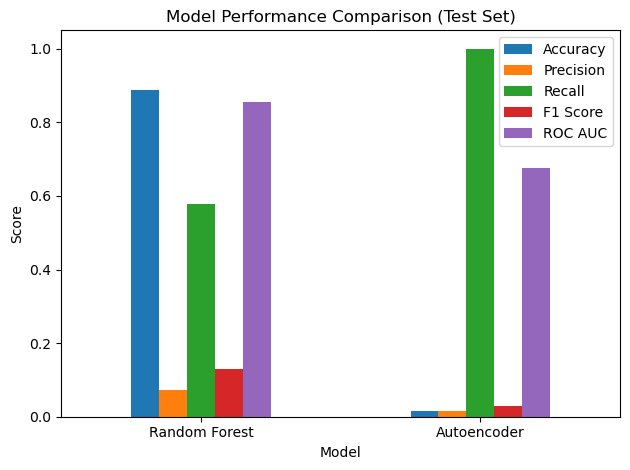

In [142]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure test data alignment
# Random Forest test data: X_test_selected, y_test
# Autoencoder test data: X_test_ae_seq, y_test_ae_seq
# Since y_test and y_test_ae_seq should correspond to the same samples, but offset by timesteps
# Align the test sets by ensuring the indices match
test_indices = y_test.index[timesteps:]  # Skip the first timesteps rows to align with sequences
y_test_aligned = y_test.loc[test_indices]
X_test_selected_aligned = X_test_selected[timesteps:]
y_test_ae_aligned = y_test_ae_seq  # Already aligned due to sequence creation

# Random Forest predictions on test set
y_pred_rf_test = rf_best.predict(X_test_selected_aligned)
y_pred_proba_rf_test = rf_best.predict_proba(X_test_selected_aligned)[:, 1]

# Autoencoder predictions on test set (already computed as y_pred_ae_optimized)
# Recalculate reconstruction errors for test set
reconstructions_test = autoencoder.predict(X_test_ae_seq)
reconstruction_errors_test = np.mean(np.square(X_test_ae_seq - reconstructions_test), axis=(1, 2))

# Use the best threshold from validation set
y_pred_ae_test = (reconstruction_errors_test > best_threshold).astype(int)

# Calculate metrics for both models
metrics = {
    'Model': ['Random Forest', 'Autoencoder'],
    'Accuracy': [accuracy_score(y_test_aligned, y_pred_rf_test), accuracy_score(y_test_ae_aligned, y_pred_ae_test)],
    'Precision': [precision_score(y_test_aligned, y_pred_rf_test), precision_score(y_test_ae_aligned, y_pred_ae_test)],
    'Recall': [recall_score(y_test_aligned, y_pred_rf_test), recall_score(y_test_ae_aligned, y_pred_ae_test)],
    'F1 Score': [f1_score(y_test_aligned, y_pred_rf_test), f1_score(y_test_ae_aligned, y_pred_ae_test)],
    'ROC AUC': [roc_auc_score(y_test_aligned, y_pred_proba_rf_test), roc_auc_score(y_test_ae_aligned, reconstruction_errors_test)]
}

# Create comparison table
comparison_df = pd.DataFrame(metrics)
print("\nModel Comparison (Test Set):\n", comparison_df)

# Visualization
plt.figure(figsize=(10, 6))
comparison_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']].plot(kind='bar')
plt.title('Model Performance Comparison (Test Set)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The model performance comparison on the test set reveals that the Random Forest model significantly outperforms the Autoencoder model in the storm prediction task. The Random Forest model achieves an accuracy of 0.8887, a precision of 0.0725, a recall of 0.5775, an F1 score of 0.1288, and an ROC AUC of 0.8551, demonstrating its strong discriminative ability on highly imbalanced data, particularly in maintaining a reasonable balance between precision and recall while achieving a high recall rate. However, its precision remains low, indicating a high rate of false positives. In contrast, the Autoencoder model, despite achieving a perfect recall of 1.000 by capturing all heavy rainfall events, suffers from an extremely low precision of 0.0144, resulting in an F1 score of only 0.0285, an accuracy of 0.0144, and an ROC AUC of 0.6756. This suggests that the Autoencoder generates a large number of false positives in its current configuration, making it nearly ineffective at distinguishing between normal and anomalous weather patterns. Overall, the Random Forest model is better suited for storm prediction, though further improvements in precision are needed, potentially through threshold adjustments or feature optimization, to reduce false alarms.